In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
0,0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [3]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data.to_csv('test_data.csv', index=None)

In [4]:
test_data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
5015,5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85,7.39
5016,5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85,7.39
5017,5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85,7.39
5018,5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85,7.39
5019,5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85,7.39
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

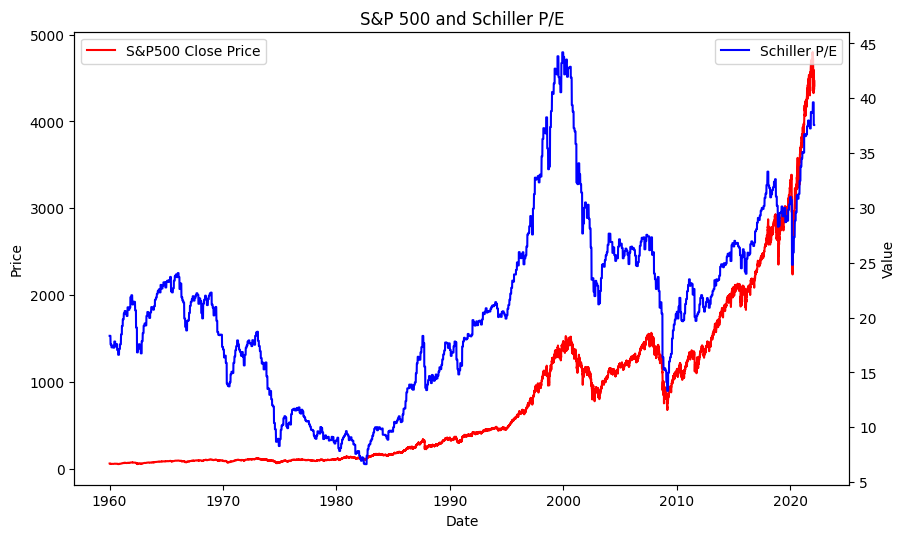

In [5]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values, 'red', label = 'S&P500 Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(data.Date, data.PE.values, 'blue', label = 'Schiller P/E')
ax2.set_ylabel("Value")
plt.legend()

plt.title("S&P 500 and Schiller P/E")
plt

In [6]:
step2_data = data[['Close','PE']].values
step2_data

array([[  59.91    ,   18.34    ],
       [  60.389999,   18.34    ],
       [  60.130001,   18.34    ],
       ...,
       [4471.07    ,   37.56    ],
       [4475.01    ,   37.56    ],
       [4380.26    ,   37.56    ]])

In [7]:
step2_date_data = data['Date'].values
step2_date_data

array(['1960-01-04T00:00:00.000000000', '1960-01-05T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', ...,
       '2022-02-15T00:00:00.000000000', '2022-02-16T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
window_size = 28
corr_array = []
corr_date_array = []
for i in range(step2_data.shape[0]-window_size + 1):
    x = step2_data[i:i+window_size, 0]
    y = step2_data[i:i+window_size, 1]
    corr = np.corrcoef(x, y)
    corr_array.append(corr[1, 0])
    corr_date_array.append(step2_date_data[i+window_size - 1])
# corr_array = np.array(corr_array)
# corr_array.shape

C:\Users\zhhua\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zhhua\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

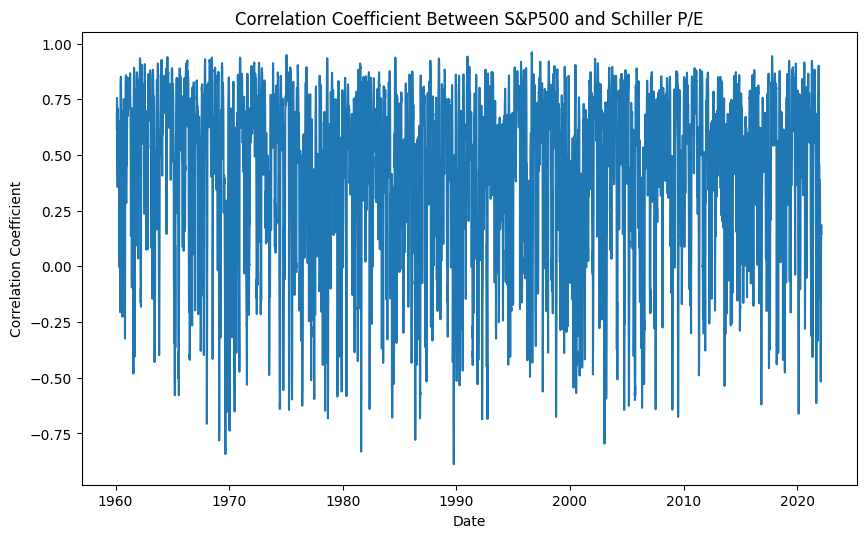

In [9]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(corr_date_array, corr_array, label = 'Corr')
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient Between S&P500 and Schiller P/E")
plt

In [279]:
initial_price = None
profit = 0
sell_point_array = []
buy_point_price_array = []
sell_point_date_array = []
label_set = np.zeros([len(corr_array), 1])

for i in range(len(corr_array)):
    if (corr_array[i] >= 0.9 and corr_array[i] <= 1):
        sell_point_array.append(corr_array[i])
#         print(str(corr_date_array[i - window_size]).replace('T00:00:00.000000000', ''))
        local_data = data.loc[(  data['Date'] >= str(corr_date_array[i - window_size + 1]).replace('T00:00:00.000000000', ''))]
        local_data = local_data.loc[( str(corr_date_array[i]).replace('T00:00:00.000000000', '') >= local_data['Date'] )]
        local_data = local_data['Close'].values
#         print(local_data)
        buy_point_price = np.amin(local_data)
        if not initial_price:
            initial_price = buy_point_price
            share_amount = int(1000000 / initial_price)
            print('share_amount: %s' % share_amount)
#         print('buy_point_price: %s' % buy_point_price)
        sell_point_date_array.append(corr_date_array[i])
#         print('corr_date_array[i]: %s' % corr_date_array[i])
        sell_point_data = data.loc[(  data['Date'] == str(corr_date_array[i]).replace('T00:00:00.000000000', ''))]
        sell_point_close_price_data = sell_point_data['Close'].values
#         print("sell_point_close_price_data: %s" % sell_point_close_price_data)
#         print('label_set[i] is 1')
        label_set[i] = 1
        profit += sell_point_close_price_data - buy_point_price
print(len(sell_point_date_array))
print('total profit: %s' % str(profit*share_amount))

share_amount: 14727
268
total profit: [1.34433798e+08]


In [11]:
len(corr_array)

15649

In [289]:
for i in label_set:
    if i[0] == 0:
        print(i)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [12]:
dataset = data[['Close']].values
date = data[['Date']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00162509],
       [0.00172626],
       [0.00167146],
       ...,
       [0.93139433],
       [0.93222479],
       [0.91225371]])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

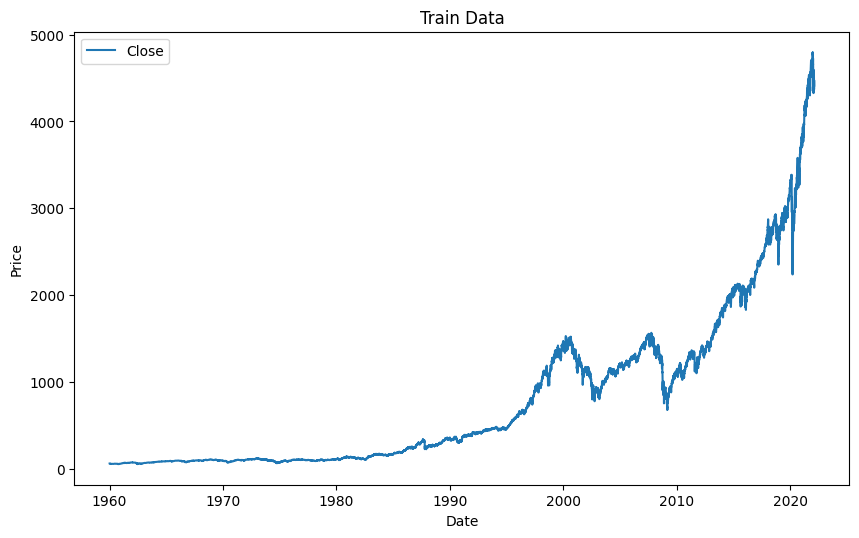

In [13]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(date[:, 0], data.Close.values, label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Train Data")
plt

In [14]:
test_dataset = test_data[['Close']].values
test_date = test_data[['Date']].values
test_dataset = scaler.fit_transform(test_dataset)
test_date.shape

(10661, 1)

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

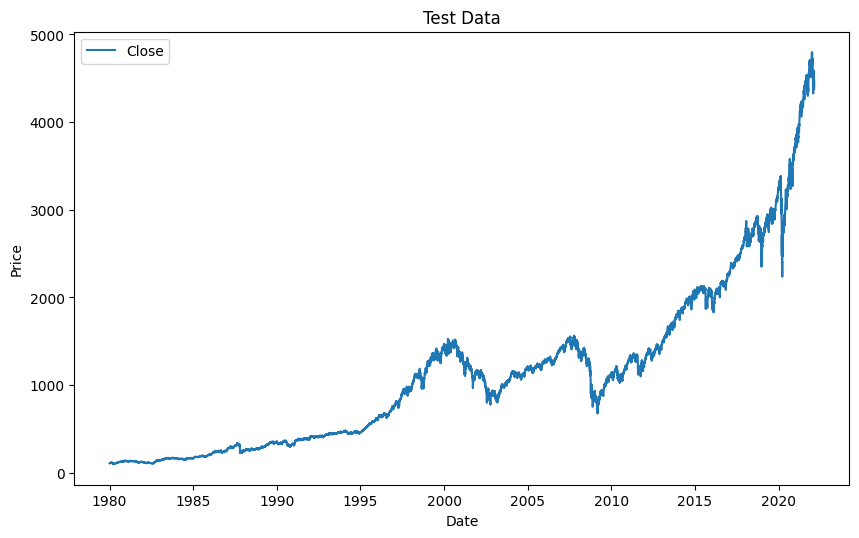

In [15]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_date[:, 0], test_data.Close.values, label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Test Data")
plt

In [358]:
cnn_full_dataset = []
for i in range(data.shape[0]-window_size + 1):
    cnn_dataset = dataset[i:i+window_size]
    cnn_full_dataset.append(np.transpose(cnn_dataset))
cnn_full_dataset = np.array(cnn_full_dataset)
cnn_full_dataset.shape

(15649, 1, 28)

In [359]:
cnn_full_dataset

array([[[1.62508726e-03, 1.72625981e-03, 1.67145832e-03, ...,
         6.57622735e-04, 7.67226560e-04, 6.93455176e-04]],

       [[1.72625981e-03, 1.67145832e-03, 1.57871620e-03, ...,
         7.67226560e-04, 6.93455176e-04, 6.28114013e-04]],

       [[1.67145832e-03, 1.57871620e-03, 1.53866886e-03, ...,
         6.93455176e-04, 6.28114013e-04, 6.87131247e-04]],

       ...,

       [[9.78814845e-01, 9.74805875e-01, 9.73385241e-01, ...,
         9.20343313e-01, 9.16766434e-01, 9.31394329e-01]],

       [[9.74805875e-01, 9.73385241e-01, 9.82402263e-01, ...,
         9.16766434e-01, 9.31394329e-01, 9.32224789e-01]],

       [[9.73385241e-01, 9.82402263e-01, 9.85201376e-01, ...,
         9.31394329e-01, 9.32224789e-01, 9.12253708e-01]]])

In [17]:
cnn_test_dataset = []
for i in range(test_dataset.shape[0]-window_size + 1):
    cnn_dataset = test_dataset[i:i+window_size]
    cnn_test_dataset.append(np.transpose(cnn_dataset))
cnn_test_dataset = np.array(cnn_test_dataset)
cnn_test_dataset.shape

(10634, 1, 28)

In [360]:
test_price_differences = []
for idx_window, prices_28_list in enumerate(cnn_test_dataset):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list[0]):
#         print('price: %s' % price)
        if idx != 0:
            difference = prices_28_list[0][idx - 1] - price
#             print(difference)
#             print(type(difference))
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    test_price_differences.append(price_differences)

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 1233
working on 1234
working on 1235
working on 1236
working on 1237
working on 1238
working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working on 1255
working on 1256
working on 1257
working on 1258
working on 1259
working on 1260
working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working 

working on 2233
working on 2234
working on 2235
working on 2236
working on 2237
working on 2238
working on 2239
working on 2240
working on 2241
working on 2242
working on 2243
working on 2244
working on 2245
working on 2246
working on 2247
working on 2248
working on 2249
working on 2250
working on 2251
working on 2252
working on 2253
working on 2254
working on 2255
working on 2256
working on 2257
working on 2258
working on 2259
working on 2260
working on 2261
working on 2262
working on 2263
working on 2264
working on 2265
working on 2266
working on 2267
working on 2268
working on 2269
working on 2270
working on 2271
working on 2272
working on 2273
working on 2274
working on 2275
working on 2276
working on 2277
working on 2278
working on 2279
working on 2280
working on 2281
working on 2282
working on 2283
working on 2284
working on 2285
working on 2286
working on 2287
working on 2288
working on 2289
working on 2290
working on 2291
working on 2292
working on 2293
working on 2294
working 

working on 3280
working on 3281
working on 3282
working on 3283
working on 3284
working on 3285
working on 3286
working on 3287
working on 3288
working on 3289
working on 3290
working on 3291
working on 3292
working on 3293
working on 3294
working on 3295
working on 3296
working on 3297
working on 3298
working on 3299
working on 3300
working on 3301
working on 3302
working on 3303
working on 3304
working on 3305
working on 3306
working on 3307
working on 3308
working on 3309
working on 3310
working on 3311
working on 3312
working on 3313
working on 3314
working on 3315
working on 3316
working on 3317
working on 3318
working on 3319
working on 3320
working on 3321
working on 3322
working on 3323
working on 3324
working on 3325
working on 3326
working on 3327
working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working on 3340
working on 3341
working 

working on 4395
working on 4396
working on 4397
working on 4398
working on 4399
working on 4400
working on 4401
working on 4402
working on 4403
working on 4404
working on 4405
working on 4406
working on 4407
working on 4408
working on 4409
working on 4410
working on 4411
working on 4412
working on 4413
working on 4414
working on 4415
working on 4416
working on 4417
working on 4418
working on 4419
working on 4420
working on 4421
working on 4422
working on 4423
working on 4424
working on 4425
working on 4426
working on 4427
working on 4428
working on 4429
working on 4430
working on 4431
working on 4432
working on 4433
working on 4434
working on 4435
working on 4436
working on 4437
working on 4438
working on 4439
working on 4440
working on 4441
working on 4442
working on 4443
working on 4444
working on 4445
working on 4446
working on 4447
working on 4448
working on 4449
working on 4450
working on 4451
working on 4452
working on 4453
working on 4454
working on 4455
working on 4456
working 

working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working on 5434
working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working on 5451
working on 5452
working on 5453
working on 5454
working on 5455
working on 5456
working on 5457
working on 5458
working on 5459
working on 5460
working on 5461
working on 5462
working on 5463
working on 5464
working on 5465
working on 5466
working on 5467
working on 5468
working on 5469
working on 5470
working on 5471
working on 5472
working on 5473
working on 5474
working on 5475
working on 5476
working on 5477
working on 5478
working on 5479
working on 5480
working on 5481
working on 5482
working on 5483
working on 5484
working on 5485
working on 5486
working 

working on 6231
working on 6232
working on 6233
working on 6234
working on 6235
working on 6236
working on 6237
working on 6238
working on 6239
working on 6240
working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working 

working on 7337
working on 7338
working on 7339
working on 7340
working on 7341
working on 7342
working on 7343
working on 7344
working on 7345
working on 7346
working on 7347
working on 7348
working on 7349
working on 7350
working on 7351
working on 7352
working on 7353
working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working on 7375
working on 7376
working on 7377
working on 7378
working on 7379
working on 7380
working on 7381
working on 7382
working on 7383
working on 7384
working on 7385
working on 7386
working on 7387
working on 7388
working on 7389
working on 7390
working on 7391
working on 7392
working on 7393
working on 7394
working on 7395
working on 7396
working on 7397
working on 7398
working 

working on 7937
working on 7938
working on 7939
working on 7940
working on 7941
working on 7942
working on 7943
working on 7944
working on 7945
working on 7946
working on 7947
working on 7948
working on 7949
working on 7950
working on 7951
working on 7952
working on 7953
working on 7954
working on 7955
working on 7956
working on 7957
working on 7958
working on 7959
working on 7960
working on 7961
working on 7962
working on 7963
working on 7964
working on 7965
working on 7966
working on 7967
working on 7968
working on 7969
working on 7970
working on 7971
working on 7972
working on 7973
working on 7974
working on 7975
working on 7976
working on 7977
working on 7978
working on 7979
working on 7980
working on 7981
working on 7982
working on 7983
working on 7984
working on 7985
working on 7986
working on 7987
working on 7988
working on 7989
working on 7990
working on 7991
working on 7992
working on 7993
working on 7994
working on 7995
working on 7996
working on 7997
working on 7998
working 

working on 8729
working on 8730
working on 8731
working on 8732
working on 8733
working on 8734
working on 8735
working on 8736
working on 8737
working on 8738
working on 8739
working on 8740
working on 8741
working on 8742
working on 8743
working on 8744
working on 8745
working on 8746
working on 8747
working on 8748
working on 8749
working on 8750
working on 8751
working on 8752
working on 8753
working on 8754
working on 8755
working on 8756
working on 8757
working on 8758
working on 8759
working on 8760
working on 8761
working on 8762
working on 8763
working on 8764
working on 8765
working on 8766
working on 8767
working on 8768
working on 8769
working on 8770
working on 8771
working on 8772
working on 8773
working on 8774
working on 8775
working on 8776
working on 8777
working on 8778
working on 8779
working on 8780
working on 8781
working on 8782
working on 8783
working on 8784
working on 8785
working on 8786
working on 8787
working on 8788
working on 8789
working on 8790
working 

working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working on 9414
working on 9415
working on 9416
working on 9417
working on 9418
working 

working on 10285
working on 10286
working on 10287
working on 10288
working on 10289
working on 10290
working on 10291
working on 10292
working on 10293
working on 10294
working on 10295
working on 10296
working on 10297
working on 10298
working on 10299
working on 10300
working on 10301
working on 10302
working on 10303
working on 10304
working on 10305
working on 10306
working on 10307
working on 10308
working on 10309
working on 10310
working on 10311
working on 10312
working on 10313
working on 10314
working on 10315
working on 10316
working on 10317
working on 10318
working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 10326
working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 103

In [367]:
test_price_differences = np.array(test_price_differences)
test_price_differences = test_price_differences.reshape((10634, 1, 27))
cnn_test_dataset = test_price_differences

In [19]:
date_list = np.array(corr_date_array)
date_list.shape

(15649,)

In [338]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=10, kernel_size=3, padding=1)
        self.activate1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=3)
        self.activate2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=20, out_channels=40, kernel_size=3)
        self.linear = nn.Linear(40*3, 2)
        self.activate3 = nn.Softmax()
    def forward(self, x):
        x = self.conv1(x)
        x = self.activate1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.activate2(x)
        x = self.max_pool2(x)
        x = self.conv3(x)

        x = x.view(-1, 40*3)
        x = self.linear(x)
#         x = self.activate3(x)
        return x

In [448]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.GRU(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [339]:
cnn_model = CNN()
cnn_learning_rate = 0.001
cnn_num_epochs = 100
cnn_model

CNN(
  (conv1): Conv1d(1, 10, kernel_size=(3,), stride=(1,), padding=(1,))
  (activate1): ReLU()
  (max_pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(10, 20, kernel_size=(3,), stride=(1,))
  (activate2): ReLU()
  (max_pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(20, 40, kernel_size=(3,), stride=(1,))
  (linear): Linear(in_features=120, out_features=2, bias=True)
  (activate3): Softmax(dim=None)
)

In [340]:
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=cnn_learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(cnn_num_epochs):
    # make training sets in torch
#     cnn_full_dataset = total_day_price_array
    cnn_full_dataset = all_price_differences
    inputs = Variable(torch.from_numpy(cnn_full_dataset).float())
    labels = Variable(torch.from_numpy(label_set).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output = cnn_model(inputs)

#     print("output:", output.shape)
#     print("labels:", labels.shape)
    # Compute loss
    loss = criterion(output, labels)
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == cnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, cnn_num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0243
[10/100] Loss: 0.0179
[20/100] Loss: 0.0172
[30/100] Loss: 0.0169
[40/100] Loss: 0.0168
[50/100] Loss: 0.0167
[60/100] Loss: 0.0166
[70/100] Loss: 0.0166
[80/100] Loss: 0.0165
[90/100] Loss: 0.0165
[99/100] Loss: 0.0165


In [343]:
# max_prob = 0
# for idx, i in enumerate(output):
#     prob = float(i[1])
#     if float(i[1]) != prob:
#         print(float(i[1]))
#         print(max_prob, idx)
# output
output[0][0]

-0.009181168

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

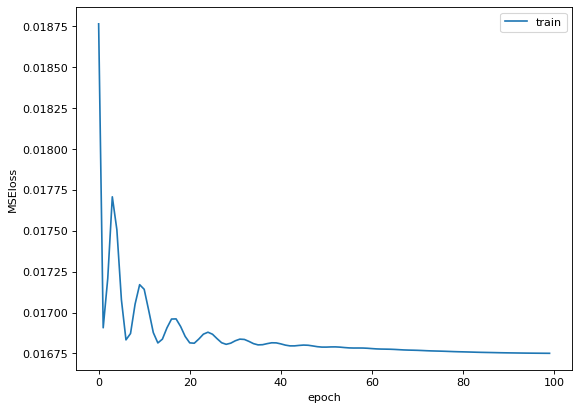

In [24]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [347]:
# output = output.detach().numpy()
cnn_train_output = np.zeros([dataset.shape[0], 1])
for i in range(output.shape[0]):
    if output[i][0] >= output[i][1]:
        print('output[i][0]: %s' % output[i][0])
        cnn_train_output[i + window_size - 1][0] = 1
len(cnn_train_output)
# output

output[i][0]: -0.009181168
output[i][0]: -0.01959233
output[i][0]: 0.008958258
output[i][0]: 0.014685936
output[i][0]: -0.00080499053
output[i][0]: 0.019032195
output[i][0]: 0.006808497
output[i][0]: 0.009198807
output[i][0]: 0.00210879
output[i][0]: 0.009753048
output[i][0]: -0.0012738481
output[i][0]: 0.0049641356
output[i][0]: 0.007913485
output[i][0]: 0.00037367642
output[i][0]: 0.017205529
output[i][0]: 0.021243088
output[i][0]: 0.048743702
output[i][0]: 0.038844608
output[i][0]: 0.03664165
output[i][0]: 0.051368646
output[i][0]: 0.045583487
output[i][0]: 0.03787712
output[i][0]: 0.023047842
output[i][0]: 0.02336932
output[i][0]: 0.015332572
output[i][0]: 0.035362475
output[i][0]: 0.017955832
output[i][0]: 0.016128734
output[i][0]: 0.018695384
output[i][0]: 0.0041692406
output[i][0]: 0.011041686
output[i][0]: 0.019788057
output[i][0]: 0.008102633
output[i][0]: 0.017059453
output[i][0]: 0.03568005
output[i][0]: 0.030589253
output[i][0]: 0.012496464
output[i][0]: 0.025969483
output[

output[i][0]: 0.00018841028
output[i][0]: 0.0018908754
output[i][0]: 0.0050961003
output[i][0]: 0.004210733
output[i][0]: 0.005466692
output[i][0]: 0.012742035
output[i][0]: 0.0022197738
output[i][0]: -0.0042120144
output[i][0]: -0.0059718713
output[i][0]: 0.00557369
output[i][0]: 0.016132407
output[i][0]: 0.0025672913
output[i][0]: 0.019218467
output[i][0]: 0.026982374
output[i][0]: 0.009437174
output[i][0]: 0.028506882
output[i][0]: 0.02253241
output[i][0]: 0.017243095
output[i][0]: 0.0072209537
output[i][0]: 0.016262315
output[i][0]: 0.009907126
output[i][0]: 0.019970886
output[i][0]: 0.0061908066
output[i][0]: 0.03022065
output[i][0]: 0.028464131
output[i][0]: 0.038258083
output[i][0]: 0.021041535
output[i][0]: 0.029015578
output[i][0]: 0.021181457
output[i][0]: 0.013753809
output[i][0]: 0.011762582
output[i][0]: 0.029167913
output[i][0]: 0.0011479855
output[i][0]: 0.018463604
output[i][0]: -0.001060456
output[i][0]: 0.0030480102
output[i][0]: 0.012590267
output[i][0]: 0.01033023
o

output[i][0]: 0.022989042
output[i][0]: 0.023168772
output[i][0]: 0.02279713
output[i][0]: 0.024381034
output[i][0]: 5.1617622e-05
output[i][0]: 0.01524251
output[i][0]: 0.011735506
output[i][0]: 0.025882088
output[i][0]: 0.014283113
output[i][0]: 0.027573198
output[i][0]: 0.033371568
output[i][0]: 0.028609462
output[i][0]: 0.043282278
output[i][0]: 0.038157932
output[i][0]: 0.0532727
output[i][0]: 0.034508683
output[i][0]: 0.052867204
output[i][0]: 0.009469919
output[i][0]: 0.003061913
output[i][0]: 0.009743147
output[i][0]: -0.0067257136
output[i][0]: 0.0064161643
output[i][0]: 0.02100239
output[i][0]: 0.0036593154
output[i][0]: 0.0060313866
output[i][0]: 0.0061298087
output[i][0]: 0.0062981546
output[i][0]: 0.001436986
output[i][0]: 0.011407636
output[i][0]: 0.009305142
output[i][0]: 0.019859768
output[i][0]: 0.0070743486
output[i][0]: 0.018360324
output[i][0]: 0.003889151
output[i][0]: 0.0027228817
output[i][0]: 0.025411136
output[i][0]: 0.03199459
output[i][0]: 0.044767566
output[

output[i][0]: 0.018664025
output[i][0]: -0.0064341202
output[i][0]: 0.016189791
output[i][0]: -0.012030628
output[i][0]: 0.011892863
output[i][0]: 0.035280973
output[i][0]: 0.01971814
output[i][0]: 0.019574113
output[i][0]: 0.010807417
output[i][0]: 0.016813464
output[i][0]: 0.008063935
output[i][0]: 0.024189495
output[i][0]: 0.037213407
output[i][0]: 0.03156937
output[i][0]: 0.025493257
output[i][0]: 0.044050924
output[i][0]: 0.03138654
output[i][0]: 0.05358606
output[i][0]: 0.042959303
output[i][0]: 0.05843342
output[i][0]: 0.05378201
output[i][0]: 0.08302743
output[i][0]: 0.07604355
output[i][0]: 0.055922903
output[i][0]: 0.053507246
output[i][0]: 0.0268436
output[i][0]: 0.032714017
output[i][0]: 0.0075498894
output[i][0]: 0.037711434
output[i][0]: 0.05012329
output[i][0]: 0.03496156
output[i][0]: 0.07871557
output[i][0]: 0.06791415
output[i][0]: 0.049750037
output[i][0]: 0.041126743
output[i][0]: 0.045196317
output[i][0]: 0.03570036
output[i][0]: 0.031116031
output[i][0]: 0.0445949

output[i][0]: 0.0069592744
output[i][0]: 0.00017427653
output[i][0]: 0.012650706
output[i][0]: 0.025172561
output[i][0]: 0.009842567
output[i][0]: 0.019287296
output[i][0]: 0.013738759
output[i][0]: 0.022712886
output[i][0]: 0.024534963
output[i][0]: 0.004722275
output[i][0]: 0.0023366883
output[i][0]: 0.0071210116
output[i][0]: 0.013802208
output[i][0]: 0.029619008
output[i][0]: 0.034692787
output[i][0]: 0.029031143
output[i][0]: 0.012583323
output[i][0]: 0.040605985
output[i][0]: 0.03848853
output[i][0]: 0.03442902
output[i][0]: 0.025079273
output[i][0]: 0.035322465
output[i][0]: 0.020289637
output[i][0]: 0.03443083
output[i][0]: 0.036201835
output[i][0]: 0.04878339
output[i][0]: 0.040902503
output[i][0]: 0.017738007
output[i][0]: 0.03076724
output[i][0]: 0.028986074
output[i][0]: 0.021749742
output[i][0]: 0.011990309
output[i][0]: 0.02878774
output[i][0]: 0.036781624
output[i][0]: 0.035045967
output[i][0]: 0.031399883
output[i][0]: 0.038530387
output[i][0]: 0.0446702
output[i][0]: 0

output[i][0]: 0.047852814
output[i][0]: 0.03061834
output[i][0]: 0.00260818
output[i][0]: 0.011616051
output[i][0]: -0.011488762
output[i][0]: -0.00066336244
output[i][0]: 0.014700972
output[i][0]: 0.0086089745
output[i][0]: 0.016948298
output[i][0]: 0.022548385
output[i][0]: 0.02224119
output[i][0]: 0.011073083
output[i][0]: 0.025265679
output[i][0]: 0.014270455
output[i][0]: 0.035415314
output[i][0]: 0.015300438
output[i][0]: 0.01263269
output[i][0]: 0.021055363
output[i][0]: 0.012017943
output[i][0]: 0.040201366
output[i][0]: 0.06160613
output[i][0]: 0.0626091
output[i][0]: 0.06422115
output[i][0]: 0.052632466
output[i][0]: 0.0072152466
output[i][0]: 0.03360925
output[i][0]: 0.017631315
output[i][0]: 0.012300067
output[i][0]: 0.019826047
output[i][0]: 0.005405277
output[i][0]: 0.00753206
output[i][0]: 0.0069358572
output[i][0]: 0.05002688
output[i][0]: 0.025451384
output[i][0]: 0.05321461
output[i][0]: 0.023260318
output[i][0]: 0.039632343
output[i][0]: 0.029032633
output[i][0]: 0.0

15676

In [355]:
for i in cnn_train_output:
    if i != 0:
        print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


In [182]:
# for i in label_set:
#     if i[0] != 0:
#         print(i)
# inputs_copy = inputs
for idx, i in enumerate(inputs):
    print('Now is working on: %s' % idx)
    for new_array_idx, new_array_i in enumerate(i[0]):
#         print(new_array_idx)
        if new_array_idx == 0:
#             print(np.array(new_array_idx), new_array_i.detach().numpy())
#             print(type(np.array(new_array_idx)), type(new_array_i.detach().numpy()))
            price_list = [float(new_array_i)]
            day_list = [new_array_idx]
#             print(new_list)
#             print(type(new_list))
        else:
            price_list += [float(new_array_i)]
            day_list += [new_array_idx]
#             print(new_list)
#             print(new_array, a)
#             print(type(new_array), type(a))
#             new_array = np.concatenate(new_array, a)
    if idx == 0:
        inputs_copy_price_list = [price_list]
        inputs_copy_day_list = [day_list]
    else:
        inputs_copy_price_list += [price_list]
        inputs_copy_day_list += [day_list]
#     inputs_copy[idx] = inputs[idx][0]
#     print(i[0])
# inputs_copy
np.array(inputs_copy_day_list)

# inputs_copy np.append

Now is working on: 0
Now is working on: 1
Now is working on: 2
Now is working on: 3
Now is working on: 4
Now is working on: 5
Now is working on: 6
Now is working on: 7
Now is working on: 8
Now is working on: 9
Now is working on: 10
Now is working on: 11
Now is working on: 12
Now is working on: 13
Now is working on: 14
Now is working on: 15
Now is working on: 16
Now is working on: 17
Now is working on: 18
Now is working on: 19
Now is working on: 20
Now is working on: 21
Now is working on: 22
Now is working on: 23
Now is working on: 24
Now is working on: 25
Now is working on: 26
Now is working on: 27
Now is working on: 28
Now is working on: 29
Now is working on: 30
Now is working on: 31
Now is working on: 32
Now is working on: 33
Now is working on: 34
Now is working on: 35
Now is working on: 36
Now is working on: 37
Now is working on: 38
Now is working on: 39
Now is working on: 40
Now is working on: 41
Now is working on: 42
Now is working on: 43
Now is working on: 44
Now is working on: 4

Now is working on: 566
Now is working on: 567
Now is working on: 568
Now is working on: 569
Now is working on: 570
Now is working on: 571
Now is working on: 572
Now is working on: 573
Now is working on: 574
Now is working on: 575
Now is working on: 576
Now is working on: 577
Now is working on: 578
Now is working on: 579
Now is working on: 580
Now is working on: 581
Now is working on: 582
Now is working on: 583
Now is working on: 584
Now is working on: 585
Now is working on: 586
Now is working on: 587
Now is working on: 588
Now is working on: 589
Now is working on: 590
Now is working on: 591
Now is working on: 592
Now is working on: 593
Now is working on: 594
Now is working on: 595
Now is working on: 596
Now is working on: 597
Now is working on: 598
Now is working on: 599
Now is working on: 600
Now is working on: 601
Now is working on: 602
Now is working on: 603
Now is working on: 604
Now is working on: 605
Now is working on: 606
Now is working on: 607
Now is working on: 608
Now is work

Now is working on: 972
Now is working on: 973
Now is working on: 974
Now is working on: 975
Now is working on: 976
Now is working on: 977
Now is working on: 978
Now is working on: 979
Now is working on: 980
Now is working on: 981
Now is working on: 982
Now is working on: 983
Now is working on: 984
Now is working on: 985
Now is working on: 986
Now is working on: 987
Now is working on: 988
Now is working on: 989
Now is working on: 990
Now is working on: 991
Now is working on: 992
Now is working on: 993
Now is working on: 994
Now is working on: 995
Now is working on: 996
Now is working on: 997
Now is working on: 998
Now is working on: 999
Now is working on: 1000
Now is working on: 1001
Now is working on: 1002
Now is working on: 1003
Now is working on: 1004
Now is working on: 1005
Now is working on: 1006
Now is working on: 1007
Now is working on: 1008
Now is working on: 1009
Now is working on: 1010
Now is working on: 1011
Now is working on: 1012
Now is working on: 1013
Now is working on: 1

Now is working on: 1340
Now is working on: 1341
Now is working on: 1342
Now is working on: 1343
Now is working on: 1344
Now is working on: 1345
Now is working on: 1346
Now is working on: 1347
Now is working on: 1348
Now is working on: 1349
Now is working on: 1350
Now is working on: 1351
Now is working on: 1352
Now is working on: 1353
Now is working on: 1354
Now is working on: 1355
Now is working on: 1356
Now is working on: 1357
Now is working on: 1358
Now is working on: 1359
Now is working on: 1360
Now is working on: 1361
Now is working on: 1362
Now is working on: 1363
Now is working on: 1364
Now is working on: 1365
Now is working on: 1366
Now is working on: 1367
Now is working on: 1368
Now is working on: 1369
Now is working on: 1370
Now is working on: 1371
Now is working on: 1372
Now is working on: 1373
Now is working on: 1374
Now is working on: 1375
Now is working on: 1376
Now is working on: 1377
Now is working on: 1378
Now is working on: 1379
Now is working on: 1380
Now is working o

Now is working on: 1812
Now is working on: 1813
Now is working on: 1814
Now is working on: 1815
Now is working on: 1816
Now is working on: 1817
Now is working on: 1818
Now is working on: 1819
Now is working on: 1820
Now is working on: 1821
Now is working on: 1822
Now is working on: 1823
Now is working on: 1824
Now is working on: 1825
Now is working on: 1826
Now is working on: 1827
Now is working on: 1828
Now is working on: 1829
Now is working on: 1830
Now is working on: 1831
Now is working on: 1832
Now is working on: 1833
Now is working on: 1834
Now is working on: 1835
Now is working on: 1836
Now is working on: 1837
Now is working on: 1838
Now is working on: 1839
Now is working on: 1840
Now is working on: 1841
Now is working on: 1842
Now is working on: 1843
Now is working on: 1844
Now is working on: 1845
Now is working on: 1846
Now is working on: 1847
Now is working on: 1848
Now is working on: 1849
Now is working on: 1850
Now is working on: 1851
Now is working on: 1852
Now is working o

Now is working on: 2267
Now is working on: 2268
Now is working on: 2269
Now is working on: 2270
Now is working on: 2271
Now is working on: 2272
Now is working on: 2273
Now is working on: 2274
Now is working on: 2275
Now is working on: 2276
Now is working on: 2277
Now is working on: 2278
Now is working on: 2279
Now is working on: 2280
Now is working on: 2281
Now is working on: 2282
Now is working on: 2283
Now is working on: 2284
Now is working on: 2285
Now is working on: 2286
Now is working on: 2287
Now is working on: 2288
Now is working on: 2289
Now is working on: 2290
Now is working on: 2291
Now is working on: 2292
Now is working on: 2293
Now is working on: 2294
Now is working on: 2295
Now is working on: 2296
Now is working on: 2297
Now is working on: 2298
Now is working on: 2299
Now is working on: 2300
Now is working on: 2301
Now is working on: 2302
Now is working on: 2303
Now is working on: 2304
Now is working on: 2305
Now is working on: 2306
Now is working on: 2307
Now is working o

Now is working on: 2799
Now is working on: 2800
Now is working on: 2801
Now is working on: 2802
Now is working on: 2803
Now is working on: 2804
Now is working on: 2805
Now is working on: 2806
Now is working on: 2807
Now is working on: 2808
Now is working on: 2809
Now is working on: 2810
Now is working on: 2811
Now is working on: 2812
Now is working on: 2813
Now is working on: 2814
Now is working on: 2815
Now is working on: 2816
Now is working on: 2817
Now is working on: 2818
Now is working on: 2819
Now is working on: 2820
Now is working on: 2821
Now is working on: 2822
Now is working on: 2823
Now is working on: 2824
Now is working on: 2825
Now is working on: 2826
Now is working on: 2827
Now is working on: 2828
Now is working on: 2829
Now is working on: 2830
Now is working on: 2831
Now is working on: 2832
Now is working on: 2833
Now is working on: 2834
Now is working on: 2835
Now is working on: 2836
Now is working on: 2837
Now is working on: 2838
Now is working on: 2839
Now is working o

Now is working on: 3245
Now is working on: 3246
Now is working on: 3247
Now is working on: 3248
Now is working on: 3249
Now is working on: 3250
Now is working on: 3251
Now is working on: 3252
Now is working on: 3253
Now is working on: 3254
Now is working on: 3255
Now is working on: 3256
Now is working on: 3257
Now is working on: 3258
Now is working on: 3259
Now is working on: 3260
Now is working on: 3261
Now is working on: 3262
Now is working on: 3263
Now is working on: 3264
Now is working on: 3265
Now is working on: 3266
Now is working on: 3267
Now is working on: 3268
Now is working on: 3269
Now is working on: 3270
Now is working on: 3271
Now is working on: 3272
Now is working on: 3273
Now is working on: 3274
Now is working on: 3275
Now is working on: 3276
Now is working on: 3277
Now is working on: 3278
Now is working on: 3279
Now is working on: 3280
Now is working on: 3281
Now is working on: 3282
Now is working on: 3283
Now is working on: 3284
Now is working on: 3285
Now is working o

Now is working on: 3699
Now is working on: 3700
Now is working on: 3701
Now is working on: 3702
Now is working on: 3703
Now is working on: 3704
Now is working on: 3705
Now is working on: 3706
Now is working on: 3707
Now is working on: 3708
Now is working on: 3709
Now is working on: 3710
Now is working on: 3711
Now is working on: 3712
Now is working on: 3713
Now is working on: 3714
Now is working on: 3715
Now is working on: 3716
Now is working on: 3717
Now is working on: 3718
Now is working on: 3719
Now is working on: 3720
Now is working on: 3721
Now is working on: 3722
Now is working on: 3723
Now is working on: 3724
Now is working on: 3725
Now is working on: 3726
Now is working on: 3727
Now is working on: 3728
Now is working on: 3729
Now is working on: 3730
Now is working on: 3731
Now is working on: 3732
Now is working on: 3733
Now is working on: 3734
Now is working on: 3735
Now is working on: 3736
Now is working on: 3737
Now is working on: 3738
Now is working on: 3739
Now is working o

Now is working on: 4155
Now is working on: 4156
Now is working on: 4157
Now is working on: 4158
Now is working on: 4159
Now is working on: 4160
Now is working on: 4161
Now is working on: 4162
Now is working on: 4163
Now is working on: 4164
Now is working on: 4165
Now is working on: 4166
Now is working on: 4167
Now is working on: 4168
Now is working on: 4169
Now is working on: 4170
Now is working on: 4171
Now is working on: 4172
Now is working on: 4173
Now is working on: 4174
Now is working on: 4175
Now is working on: 4176
Now is working on: 4177
Now is working on: 4178
Now is working on: 4179
Now is working on: 4180
Now is working on: 4181
Now is working on: 4182
Now is working on: 4183
Now is working on: 4184
Now is working on: 4185
Now is working on: 4186
Now is working on: 4187
Now is working on: 4188
Now is working on: 4189
Now is working on: 4190
Now is working on: 4191
Now is working on: 4192
Now is working on: 4193
Now is working on: 4194
Now is working on: 4195
Now is working o

Now is working on: 4658
Now is working on: 4659
Now is working on: 4660
Now is working on: 4661
Now is working on: 4662
Now is working on: 4663
Now is working on: 4664
Now is working on: 4665
Now is working on: 4666
Now is working on: 4667
Now is working on: 4668
Now is working on: 4669
Now is working on: 4670
Now is working on: 4671
Now is working on: 4672
Now is working on: 4673
Now is working on: 4674
Now is working on: 4675
Now is working on: 4676
Now is working on: 4677
Now is working on: 4678
Now is working on: 4679
Now is working on: 4680
Now is working on: 4681
Now is working on: 4682
Now is working on: 4683
Now is working on: 4684
Now is working on: 4685
Now is working on: 4686
Now is working on: 4687
Now is working on: 4688
Now is working on: 4689
Now is working on: 4690
Now is working on: 4691
Now is working on: 4692
Now is working on: 4693
Now is working on: 4694
Now is working on: 4695
Now is working on: 4696
Now is working on: 4697
Now is working on: 4698
Now is working o

Now is working on: 5200
Now is working on: 5201
Now is working on: 5202
Now is working on: 5203
Now is working on: 5204
Now is working on: 5205
Now is working on: 5206
Now is working on: 5207
Now is working on: 5208
Now is working on: 5209
Now is working on: 5210
Now is working on: 5211
Now is working on: 5212
Now is working on: 5213
Now is working on: 5214
Now is working on: 5215
Now is working on: 5216
Now is working on: 5217
Now is working on: 5218
Now is working on: 5219
Now is working on: 5220
Now is working on: 5221
Now is working on: 5222
Now is working on: 5223
Now is working on: 5224
Now is working on: 5225
Now is working on: 5226
Now is working on: 5227
Now is working on: 5228
Now is working on: 5229
Now is working on: 5230
Now is working on: 5231
Now is working on: 5232
Now is working on: 5233
Now is working on: 5234
Now is working on: 5235
Now is working on: 5236
Now is working on: 5237
Now is working on: 5238
Now is working on: 5239
Now is working on: 5240
Now is working o

Now is working on: 5897
Now is working on: 5898
Now is working on: 5899
Now is working on: 5900
Now is working on: 5901
Now is working on: 5902
Now is working on: 5903
Now is working on: 5904
Now is working on: 5905
Now is working on: 5906
Now is working on: 5907
Now is working on: 5908
Now is working on: 5909
Now is working on: 5910
Now is working on: 5911
Now is working on: 5912
Now is working on: 5913
Now is working on: 5914
Now is working on: 5915
Now is working on: 5916
Now is working on: 5917
Now is working on: 5918
Now is working on: 5919
Now is working on: 5920
Now is working on: 5921
Now is working on: 5922
Now is working on: 5923
Now is working on: 5924
Now is working on: 5925
Now is working on: 5926
Now is working on: 5927
Now is working on: 5928
Now is working on: 5929
Now is working on: 5930
Now is working on: 5931
Now is working on: 5932
Now is working on: 5933
Now is working on: 5934
Now is working on: 5935
Now is working on: 5936
Now is working on: 5937
Now is working o

Now is working on: 6328
Now is working on: 6329
Now is working on: 6330
Now is working on: 6331
Now is working on: 6332
Now is working on: 6333
Now is working on: 6334
Now is working on: 6335
Now is working on: 6336
Now is working on: 6337
Now is working on: 6338
Now is working on: 6339
Now is working on: 6340
Now is working on: 6341
Now is working on: 6342
Now is working on: 6343
Now is working on: 6344
Now is working on: 6345
Now is working on: 6346
Now is working on: 6347
Now is working on: 6348
Now is working on: 6349
Now is working on: 6350
Now is working on: 6351
Now is working on: 6352
Now is working on: 6353
Now is working on: 6354
Now is working on: 6355
Now is working on: 6356
Now is working on: 6357
Now is working on: 6358
Now is working on: 6359
Now is working on: 6360
Now is working on: 6361
Now is working on: 6362
Now is working on: 6363
Now is working on: 6364
Now is working on: 6365
Now is working on: 6366
Now is working on: 6367
Now is working on: 6368
Now is working o

Now is working on: 7029
Now is working on: 7030
Now is working on: 7031
Now is working on: 7032
Now is working on: 7033
Now is working on: 7034
Now is working on: 7035
Now is working on: 7036
Now is working on: 7037
Now is working on: 7038
Now is working on: 7039
Now is working on: 7040
Now is working on: 7041
Now is working on: 7042
Now is working on: 7043
Now is working on: 7044
Now is working on: 7045
Now is working on: 7046
Now is working on: 7047
Now is working on: 7048
Now is working on: 7049
Now is working on: 7050
Now is working on: 7051
Now is working on: 7052
Now is working on: 7053
Now is working on: 7054
Now is working on: 7055
Now is working on: 7056
Now is working on: 7057
Now is working on: 7058
Now is working on: 7059
Now is working on: 7060
Now is working on: 7061
Now is working on: 7062
Now is working on: 7063
Now is working on: 7064
Now is working on: 7065
Now is working on: 7066
Now is working on: 7067
Now is working on: 7068
Now is working on: 7069
Now is working o

Now is working on: 7663
Now is working on: 7664
Now is working on: 7665
Now is working on: 7666
Now is working on: 7667
Now is working on: 7668
Now is working on: 7669
Now is working on: 7670
Now is working on: 7671
Now is working on: 7672
Now is working on: 7673
Now is working on: 7674
Now is working on: 7675
Now is working on: 7676
Now is working on: 7677
Now is working on: 7678
Now is working on: 7679
Now is working on: 7680
Now is working on: 7681
Now is working on: 7682
Now is working on: 7683
Now is working on: 7684
Now is working on: 7685
Now is working on: 7686
Now is working on: 7687
Now is working on: 7688
Now is working on: 7689
Now is working on: 7690
Now is working on: 7691
Now is working on: 7692
Now is working on: 7693
Now is working on: 7694
Now is working on: 7695
Now is working on: 7696
Now is working on: 7697
Now is working on: 7698
Now is working on: 7699
Now is working on: 7700
Now is working on: 7701
Now is working on: 7702
Now is working on: 7703
Now is working o

Now is working on: 8172
Now is working on: 8173
Now is working on: 8174
Now is working on: 8175
Now is working on: 8176
Now is working on: 8177
Now is working on: 8178
Now is working on: 8179
Now is working on: 8180
Now is working on: 8181
Now is working on: 8182
Now is working on: 8183
Now is working on: 8184
Now is working on: 8185
Now is working on: 8186
Now is working on: 8187
Now is working on: 8188
Now is working on: 8189
Now is working on: 8190
Now is working on: 8191
Now is working on: 8192
Now is working on: 8193
Now is working on: 8194
Now is working on: 8195
Now is working on: 8196
Now is working on: 8197
Now is working on: 8198
Now is working on: 8199
Now is working on: 8200
Now is working on: 8201
Now is working on: 8202
Now is working on: 8203
Now is working on: 8204
Now is working on: 8205
Now is working on: 8206
Now is working on: 8207
Now is working on: 8208
Now is working on: 8209
Now is working on: 8210
Now is working on: 8211
Now is working on: 8212
Now is working o

Now is working on: 8539
Now is working on: 8540
Now is working on: 8541
Now is working on: 8542
Now is working on: 8543
Now is working on: 8544
Now is working on: 8545
Now is working on: 8546
Now is working on: 8547
Now is working on: 8548
Now is working on: 8549
Now is working on: 8550
Now is working on: 8551
Now is working on: 8552
Now is working on: 8553
Now is working on: 8554
Now is working on: 8555
Now is working on: 8556
Now is working on: 8557
Now is working on: 8558
Now is working on: 8559
Now is working on: 8560
Now is working on: 8561
Now is working on: 8562
Now is working on: 8563
Now is working on: 8564
Now is working on: 8565
Now is working on: 8566
Now is working on: 8567
Now is working on: 8568
Now is working on: 8569
Now is working on: 8570
Now is working on: 8571
Now is working on: 8572
Now is working on: 8573
Now is working on: 8574
Now is working on: 8575
Now is working on: 8576
Now is working on: 8577
Now is working on: 8578
Now is working on: 8579
Now is working o

Now is working on: 9059
Now is working on: 9060
Now is working on: 9061
Now is working on: 9062
Now is working on: 9063
Now is working on: 9064
Now is working on: 9065
Now is working on: 9066
Now is working on: 9067
Now is working on: 9068
Now is working on: 9069
Now is working on: 9070
Now is working on: 9071
Now is working on: 9072
Now is working on: 9073
Now is working on: 9074
Now is working on: 9075
Now is working on: 9076
Now is working on: 9077
Now is working on: 9078
Now is working on: 9079
Now is working on: 9080
Now is working on: 9081
Now is working on: 9082
Now is working on: 9083
Now is working on: 9084
Now is working on: 9085
Now is working on: 9086
Now is working on: 9087
Now is working on: 9088
Now is working on: 9089
Now is working on: 9090
Now is working on: 9091
Now is working on: 9092
Now is working on: 9093
Now is working on: 9094
Now is working on: 9095
Now is working on: 9096
Now is working on: 9097
Now is working on: 9098
Now is working on: 9099
Now is working o

Now is working on: 9428
Now is working on: 9429
Now is working on: 9430
Now is working on: 9431
Now is working on: 9432
Now is working on: 9433
Now is working on: 9434
Now is working on: 9435
Now is working on: 9436
Now is working on: 9437
Now is working on: 9438
Now is working on: 9439
Now is working on: 9440
Now is working on: 9441
Now is working on: 9442
Now is working on: 9443
Now is working on: 9444
Now is working on: 9445
Now is working on: 9446
Now is working on: 9447
Now is working on: 9448
Now is working on: 9449
Now is working on: 9450
Now is working on: 9451
Now is working on: 9452
Now is working on: 9453
Now is working on: 9454
Now is working on: 9455
Now is working on: 9456
Now is working on: 9457
Now is working on: 9458
Now is working on: 9459
Now is working on: 9460
Now is working on: 9461
Now is working on: 9462
Now is working on: 9463
Now is working on: 9464
Now is working on: 9465
Now is working on: 9466
Now is working on: 9467
Now is working on: 9468
Now is working o

Now is working on: 10057
Now is working on: 10058
Now is working on: 10059
Now is working on: 10060
Now is working on: 10061
Now is working on: 10062
Now is working on: 10063
Now is working on: 10064
Now is working on: 10065
Now is working on: 10066
Now is working on: 10067
Now is working on: 10068
Now is working on: 10069
Now is working on: 10070
Now is working on: 10071
Now is working on: 10072
Now is working on: 10073
Now is working on: 10074
Now is working on: 10075
Now is working on: 10076
Now is working on: 10077
Now is working on: 10078
Now is working on: 10079
Now is working on: 10080
Now is working on: 10081
Now is working on: 10082
Now is working on: 10083
Now is working on: 10084
Now is working on: 10085
Now is working on: 10086
Now is working on: 10087
Now is working on: 10088
Now is working on: 10089
Now is working on: 10090
Now is working on: 10091
Now is working on: 10092
Now is working on: 10093
Now is working on: 10094
Now is working on: 10095
Now is working on: 10096


Now is working on: 10523
Now is working on: 10524
Now is working on: 10525
Now is working on: 10526
Now is working on: 10527
Now is working on: 10528
Now is working on: 10529
Now is working on: 10530
Now is working on: 10531
Now is working on: 10532
Now is working on: 10533
Now is working on: 10534
Now is working on: 10535
Now is working on: 10536
Now is working on: 10537
Now is working on: 10538
Now is working on: 10539
Now is working on: 10540
Now is working on: 10541
Now is working on: 10542
Now is working on: 10543
Now is working on: 10544
Now is working on: 10545
Now is working on: 10546
Now is working on: 10547
Now is working on: 10548
Now is working on: 10549
Now is working on: 10550
Now is working on: 10551
Now is working on: 10552
Now is working on: 10553
Now is working on: 10554
Now is working on: 10555
Now is working on: 10556
Now is working on: 10557
Now is working on: 10558
Now is working on: 10559
Now is working on: 10560
Now is working on: 10561
Now is working on: 10562


Now is working on: 10917
Now is working on: 10918
Now is working on: 10919
Now is working on: 10920
Now is working on: 10921
Now is working on: 10922
Now is working on: 10923
Now is working on: 10924
Now is working on: 10925
Now is working on: 10926
Now is working on: 10927
Now is working on: 10928
Now is working on: 10929
Now is working on: 10930
Now is working on: 10931
Now is working on: 10932
Now is working on: 10933
Now is working on: 10934
Now is working on: 10935
Now is working on: 10936
Now is working on: 10937
Now is working on: 10938
Now is working on: 10939
Now is working on: 10940
Now is working on: 10941
Now is working on: 10942
Now is working on: 10943
Now is working on: 10944
Now is working on: 10945
Now is working on: 10946
Now is working on: 10947
Now is working on: 10948
Now is working on: 10949
Now is working on: 10950
Now is working on: 10951
Now is working on: 10952
Now is working on: 10953
Now is working on: 10954
Now is working on: 10955
Now is working on: 10956


Now is working on: 11255
Now is working on: 11256
Now is working on: 11257
Now is working on: 11258
Now is working on: 11259
Now is working on: 11260
Now is working on: 11261
Now is working on: 11262
Now is working on: 11263
Now is working on: 11264
Now is working on: 11265
Now is working on: 11266
Now is working on: 11267
Now is working on: 11268
Now is working on: 11269
Now is working on: 11270
Now is working on: 11271
Now is working on: 11272
Now is working on: 11273
Now is working on: 11274
Now is working on: 11275
Now is working on: 11276
Now is working on: 11277
Now is working on: 11278
Now is working on: 11279
Now is working on: 11280
Now is working on: 11281
Now is working on: 11282
Now is working on: 11283
Now is working on: 11284
Now is working on: 11285
Now is working on: 11286
Now is working on: 11287
Now is working on: 11288
Now is working on: 11289
Now is working on: 11290
Now is working on: 11291
Now is working on: 11292
Now is working on: 11293
Now is working on: 11294


Now is working on: 11716
Now is working on: 11717
Now is working on: 11718
Now is working on: 11719
Now is working on: 11720
Now is working on: 11721
Now is working on: 11722
Now is working on: 11723
Now is working on: 11724
Now is working on: 11725
Now is working on: 11726
Now is working on: 11727
Now is working on: 11728
Now is working on: 11729
Now is working on: 11730
Now is working on: 11731
Now is working on: 11732
Now is working on: 11733
Now is working on: 11734
Now is working on: 11735
Now is working on: 11736
Now is working on: 11737
Now is working on: 11738
Now is working on: 11739
Now is working on: 11740
Now is working on: 11741
Now is working on: 11742
Now is working on: 11743
Now is working on: 11744
Now is working on: 11745
Now is working on: 11746
Now is working on: 11747
Now is working on: 11748
Now is working on: 11749
Now is working on: 11750
Now is working on: 11751
Now is working on: 11752
Now is working on: 11753
Now is working on: 11754
Now is working on: 11755


Now is working on: 12175
Now is working on: 12176
Now is working on: 12177
Now is working on: 12178
Now is working on: 12179
Now is working on: 12180
Now is working on: 12181
Now is working on: 12182
Now is working on: 12183
Now is working on: 12184
Now is working on: 12185
Now is working on: 12186
Now is working on: 12187
Now is working on: 12188
Now is working on: 12189
Now is working on: 12190
Now is working on: 12191
Now is working on: 12192
Now is working on: 12193
Now is working on: 12194
Now is working on: 12195
Now is working on: 12196
Now is working on: 12197
Now is working on: 12198
Now is working on: 12199
Now is working on: 12200
Now is working on: 12201
Now is working on: 12202
Now is working on: 12203
Now is working on: 12204
Now is working on: 12205
Now is working on: 12206
Now is working on: 12207
Now is working on: 12208
Now is working on: 12209
Now is working on: 12210
Now is working on: 12211
Now is working on: 12212
Now is working on: 12213
Now is working on: 12214


Now is working on: 12531
Now is working on: 12532
Now is working on: 12533
Now is working on: 12534
Now is working on: 12535
Now is working on: 12536
Now is working on: 12537
Now is working on: 12538
Now is working on: 12539
Now is working on: 12540
Now is working on: 12541
Now is working on: 12542
Now is working on: 12543
Now is working on: 12544
Now is working on: 12545
Now is working on: 12546
Now is working on: 12547
Now is working on: 12548
Now is working on: 12549
Now is working on: 12550
Now is working on: 12551
Now is working on: 12552
Now is working on: 12553
Now is working on: 12554
Now is working on: 12555
Now is working on: 12556
Now is working on: 12557
Now is working on: 12558
Now is working on: 12559
Now is working on: 12560
Now is working on: 12561
Now is working on: 12562
Now is working on: 12563
Now is working on: 12564
Now is working on: 12565
Now is working on: 12566
Now is working on: 12567
Now is working on: 12568
Now is working on: 12569
Now is working on: 12570


Now is working on: 12940
Now is working on: 12941
Now is working on: 12942
Now is working on: 12943
Now is working on: 12944
Now is working on: 12945
Now is working on: 12946
Now is working on: 12947
Now is working on: 12948
Now is working on: 12949
Now is working on: 12950
Now is working on: 12951
Now is working on: 12952
Now is working on: 12953
Now is working on: 12954
Now is working on: 12955
Now is working on: 12956
Now is working on: 12957
Now is working on: 12958
Now is working on: 12959
Now is working on: 12960
Now is working on: 12961
Now is working on: 12962
Now is working on: 12963
Now is working on: 12964
Now is working on: 12965
Now is working on: 12966
Now is working on: 12967
Now is working on: 12968
Now is working on: 12969
Now is working on: 12970
Now is working on: 12971
Now is working on: 12972
Now is working on: 12973
Now is working on: 12974
Now is working on: 12975
Now is working on: 12976
Now is working on: 12977
Now is working on: 12978
Now is working on: 12979


Now is working on: 13308
Now is working on: 13309
Now is working on: 13310
Now is working on: 13311
Now is working on: 13312
Now is working on: 13313
Now is working on: 13314
Now is working on: 13315
Now is working on: 13316
Now is working on: 13317
Now is working on: 13318
Now is working on: 13319
Now is working on: 13320
Now is working on: 13321
Now is working on: 13322
Now is working on: 13323
Now is working on: 13324
Now is working on: 13325
Now is working on: 13326
Now is working on: 13327
Now is working on: 13328
Now is working on: 13329
Now is working on: 13330
Now is working on: 13331
Now is working on: 13332
Now is working on: 13333
Now is working on: 13334
Now is working on: 13335
Now is working on: 13336
Now is working on: 13337
Now is working on: 13338
Now is working on: 13339
Now is working on: 13340
Now is working on: 13341
Now is working on: 13342
Now is working on: 13343
Now is working on: 13344
Now is working on: 13345
Now is working on: 13346
Now is working on: 13347


Now is working on: 13706
Now is working on: 13707
Now is working on: 13708
Now is working on: 13709
Now is working on: 13710
Now is working on: 13711
Now is working on: 13712
Now is working on: 13713
Now is working on: 13714
Now is working on: 13715
Now is working on: 13716
Now is working on: 13717
Now is working on: 13718
Now is working on: 13719
Now is working on: 13720
Now is working on: 13721
Now is working on: 13722
Now is working on: 13723
Now is working on: 13724
Now is working on: 13725
Now is working on: 13726
Now is working on: 13727
Now is working on: 13728
Now is working on: 13729
Now is working on: 13730
Now is working on: 13731
Now is working on: 13732
Now is working on: 13733
Now is working on: 13734
Now is working on: 13735
Now is working on: 13736
Now is working on: 13737
Now is working on: 13738
Now is working on: 13739
Now is working on: 13740
Now is working on: 13741
Now is working on: 13742
Now is working on: 13743
Now is working on: 13744
Now is working on: 13745


Now is working on: 14255
Now is working on: 14256
Now is working on: 14257
Now is working on: 14258
Now is working on: 14259
Now is working on: 14260
Now is working on: 14261
Now is working on: 14262
Now is working on: 14263
Now is working on: 14264
Now is working on: 14265
Now is working on: 14266
Now is working on: 14267
Now is working on: 14268
Now is working on: 14269
Now is working on: 14270
Now is working on: 14271
Now is working on: 14272
Now is working on: 14273
Now is working on: 14274
Now is working on: 14275
Now is working on: 14276
Now is working on: 14277
Now is working on: 14278
Now is working on: 14279
Now is working on: 14280
Now is working on: 14281
Now is working on: 14282
Now is working on: 14283
Now is working on: 14284
Now is working on: 14285
Now is working on: 14286
Now is working on: 14287
Now is working on: 14288
Now is working on: 14289
Now is working on: 14290
Now is working on: 14291
Now is working on: 14292
Now is working on: 14293
Now is working on: 14294


Now is working on: 14842
Now is working on: 14843
Now is working on: 14844
Now is working on: 14845
Now is working on: 14846
Now is working on: 14847
Now is working on: 14848
Now is working on: 14849
Now is working on: 14850
Now is working on: 14851
Now is working on: 14852
Now is working on: 14853
Now is working on: 14854
Now is working on: 14855
Now is working on: 14856
Now is working on: 14857
Now is working on: 14858
Now is working on: 14859
Now is working on: 14860
Now is working on: 14861
Now is working on: 14862
Now is working on: 14863
Now is working on: 14864
Now is working on: 14865
Now is working on: 14866
Now is working on: 14867
Now is working on: 14868
Now is working on: 14869
Now is working on: 14870
Now is working on: 14871
Now is working on: 14872
Now is working on: 14873
Now is working on: 14874
Now is working on: 14875
Now is working on: 14876
Now is working on: 14877
Now is working on: 14878
Now is working on: 14879
Now is working on: 14880
Now is working on: 14881


Now is working on: 15328
Now is working on: 15329
Now is working on: 15330
Now is working on: 15331
Now is working on: 15332
Now is working on: 15333
Now is working on: 15334
Now is working on: 15335
Now is working on: 15336
Now is working on: 15337
Now is working on: 15338
Now is working on: 15339
Now is working on: 15340
Now is working on: 15341
Now is working on: 15342
Now is working on: 15343
Now is working on: 15344
Now is working on: 15345
Now is working on: 15346
Now is working on: 15347
Now is working on: 15348
Now is working on: 15349
Now is working on: 15350
Now is working on: 15351
Now is working on: 15352
Now is working on: 15353
Now is working on: 15354
Now is working on: 15355
Now is working on: 15356
Now is working on: 15357
Now is working on: 15358
Now is working on: 15359
Now is working on: 15360
Now is working on: 15361
Now is working on: 15362
Now is working on: 15363
Now is working on: 15364
Now is working on: 15365
Now is working on: 15366
Now is working on: 15367


array([[0.00000000e+00, 1.62508723e-03, 1.00000000e+00, ...,
        7.67226564e-04, 2.70000000e+01, 6.93455164e-04],
       [0.00000000e+00, 1.72625983e-03, 1.00000000e+00, ...,
        6.93455164e-04, 2.70000000e+01, 6.28114038e-04],
       [0.00000000e+00, 1.67145836e-03, 1.00000000e+00, ...,
        6.28114038e-04, 2.70000000e+01, 6.87131251e-04],
       ...,
       [0.00000000e+00, 9.78814840e-01, 1.00000000e+00, ...,
        9.16766405e-01, 2.70000000e+01, 9.31394339e-01],
       [0.00000000e+00, 9.74805892e-01, 1.00000000e+00, ...,
        9.31394339e-01, 2.70000000e+01, 9.32224810e-01],
       [0.00000000e+00, 9.73385215e-01, 1.00000000e+00, ...,
        9.32224810e-01, 2.70000000e+01, 9.12253678e-01]])

In [240]:
# 1 -> 0.9
# 2 -> 0.91
# 3 -> 0.9
# 4 -> 0.91

inputs_price_list = np.array(inputs_copy_price_list).reshape((15649, 1, 28))
inputs_day_list = np.array(inputs_copy_day_list).reshape((15649, 1, 28))
print(inputs_price_list.shape)
print(inputs_day_list.shape)
total_day_price_list = []
for i in range(inputs_price_list.shape[0]):
    print('Working on %s' % i)
    day_price_list = []
    for idx, price in enumerate(inputs_price_list[0]):
        day_price = [inputs_day_list[0][idx], price]
        day_price_list.append(day_price)
    total_day_price_list.append(day_price_list)
#     print(total_day_price_list)
#     break
# total_day_price_list.shape

(15649, 1, 28)
(15649, 1, 28)
Working on 0
Working on 1
Working on 2
Working on 3
Working on 4
Working on 5
Working on 6
Working on 7
Working on 8
Working on 9
Working on 10
Working on 11
Working on 12
Working on 13
Working on 14
Working on 15
Working on 16
Working on 17
Working on 18
Working on 19
Working on 20
Working on 21
Working on 22
Working on 23
Working on 24
Working on 25
Working on 26
Working on 27
Working on 28
Working on 29
Working on 30
Working on 31
Working on 32
Working on 33
Working on 34
Working on 35
Working on 36
Working on 37
Working on 38
Working on 39
Working on 40
Working on 41
Working on 42
Working on 43
Working on 44
Working on 45
Working on 46
Working on 47
Working on 48
Working on 49
Working on 50
Working on 51
Working on 52
Working on 53
Working on 54
Working on 55
Working on 56
Working on 57
Working on 58
Working on 59
Working on 60
Working on 61
Working on 62
Working on 63
Working on 64
Working on 65
Working on 66
Working on 67
Working on 68
Working on 69


Working on 1486
Working on 1487
Working on 1488
Working on 1489
Working on 1490
Working on 1491
Working on 1492
Working on 1493
Working on 1494
Working on 1495
Working on 1496
Working on 1497
Working on 1498
Working on 1499
Working on 1500
Working on 1501
Working on 1502
Working on 1503
Working on 1504
Working on 1505
Working on 1506
Working on 1507
Working on 1508
Working on 1509
Working on 1510
Working on 1511
Working on 1512
Working on 1513
Working on 1514
Working on 1515
Working on 1516
Working on 1517
Working on 1518
Working on 1519
Working on 1520
Working on 1521
Working on 1522
Working on 1523
Working on 1524
Working on 1525
Working on 1526
Working on 1527
Working on 1528
Working on 1529
Working on 1530
Working on 1531
Working on 1532
Working on 1533
Working on 1534
Working on 1535
Working on 1536
Working on 1537
Working on 1538
Working on 1539
Working on 1540
Working on 1541
Working on 1542
Working on 1543
Working on 1544
Working on 1545
Working on 1546
Working on 1547
Working 

Working on 2633
Working on 2634
Working on 2635
Working on 2636
Working on 2637
Working on 2638
Working on 2639
Working on 2640
Working on 2641
Working on 2642
Working on 2643
Working on 2644
Working on 2645
Working on 2646
Working on 2647
Working on 2648
Working on 2649
Working on 2650
Working on 2651
Working on 2652
Working on 2653
Working on 2654
Working on 2655
Working on 2656
Working on 2657
Working on 2658
Working on 2659
Working on 2660
Working on 2661
Working on 2662
Working on 2663
Working on 2664
Working on 2665
Working on 2666
Working on 2667
Working on 2668
Working on 2669
Working on 2670
Working on 2671
Working on 2672
Working on 2673
Working on 2674
Working on 2675
Working on 2676
Working on 2677
Working on 2678
Working on 2679
Working on 2680
Working on 2681
Working on 2682
Working on 2683
Working on 2684
Working on 2685
Working on 2686
Working on 2687
Working on 2688
Working on 2689
Working on 2690
Working on 2691
Working on 2692
Working on 2693
Working on 2694
Working 

Working on 3632
Working on 3633
Working on 3634
Working on 3635
Working on 3636
Working on 3637
Working on 3638
Working on 3639
Working on 3640
Working on 3641
Working on 3642
Working on 3643
Working on 3644
Working on 3645
Working on 3646
Working on 3647
Working on 3648
Working on 3649
Working on 3650
Working on 3651
Working on 3652
Working on 3653
Working on 3654
Working on 3655
Working on 3656
Working on 3657
Working on 3658
Working on 3659
Working on 3660
Working on 3661
Working on 3662
Working on 3663
Working on 3664
Working on 3665
Working on 3666
Working on 3667
Working on 3668
Working on 3669
Working on 3670
Working on 3671
Working on 3672
Working on 3673
Working on 3674
Working on 3675
Working on 3676
Working on 3677
Working on 3678
Working on 3679
Working on 3680
Working on 3681
Working on 3682
Working on 3683
Working on 3684
Working on 3685
Working on 3686
Working on 3687
Working on 3688
Working on 3689
Working on 3690
Working on 3691
Working on 3692
Working on 3693
Working 

Working on 4632
Working on 4633
Working on 4634
Working on 4635
Working on 4636
Working on 4637
Working on 4638
Working on 4639
Working on 4640
Working on 4641
Working on 4642
Working on 4643
Working on 4644
Working on 4645
Working on 4646
Working on 4647
Working on 4648
Working on 4649
Working on 4650
Working on 4651
Working on 4652
Working on 4653
Working on 4654
Working on 4655
Working on 4656
Working on 4657
Working on 4658
Working on 4659
Working on 4660
Working on 4661
Working on 4662
Working on 4663
Working on 4664
Working on 4665
Working on 4666
Working on 4667
Working on 4668
Working on 4669
Working on 4670
Working on 4671
Working on 4672
Working on 4673
Working on 4674
Working on 4675
Working on 4676
Working on 4677
Working on 4678
Working on 4679
Working on 4680
Working on 4681
Working on 4682
Working on 4683
Working on 4684
Working on 4685
Working on 4686
Working on 4687
Working on 4688
Working on 4689
Working on 4690
Working on 4691
Working on 4692
Working on 4693
Working 

Working on 5484
Working on 5485
Working on 5486
Working on 5487
Working on 5488
Working on 5489
Working on 5490
Working on 5491
Working on 5492
Working on 5493
Working on 5494
Working on 5495
Working on 5496
Working on 5497
Working on 5498
Working on 5499
Working on 5500
Working on 5501
Working on 5502
Working on 5503
Working on 5504
Working on 5505
Working on 5506
Working on 5507
Working on 5508
Working on 5509
Working on 5510
Working on 5511
Working on 5512
Working on 5513
Working on 5514
Working on 5515
Working on 5516
Working on 5517
Working on 5518
Working on 5519
Working on 5520
Working on 5521
Working on 5522
Working on 5523
Working on 5524
Working on 5525
Working on 5526
Working on 5527
Working on 5528
Working on 5529
Working on 5530
Working on 5531
Working on 5532
Working on 5533
Working on 5534
Working on 5535
Working on 5536
Working on 5537
Working on 5538
Working on 5539
Working on 5540
Working on 5541
Working on 5542
Working on 5543
Working on 5544
Working on 5545
Working 

Working on 6131
Working on 6132
Working on 6133
Working on 6134
Working on 6135
Working on 6136
Working on 6137
Working on 6138
Working on 6139
Working on 6140
Working on 6141
Working on 6142
Working on 6143
Working on 6144
Working on 6145
Working on 6146
Working on 6147
Working on 6148
Working on 6149
Working on 6150
Working on 6151
Working on 6152
Working on 6153
Working on 6154
Working on 6155
Working on 6156
Working on 6157
Working on 6158
Working on 6159
Working on 6160
Working on 6161
Working on 6162
Working on 6163
Working on 6164
Working on 6165
Working on 6166
Working on 6167
Working on 6168
Working on 6169
Working on 6170
Working on 6171
Working on 6172
Working on 6173
Working on 6174
Working on 6175
Working on 6176
Working on 6177
Working on 6178
Working on 6179
Working on 6180
Working on 6181
Working on 6182
Working on 6183
Working on 6184
Working on 6185
Working on 6186
Working on 6187
Working on 6188
Working on 6189
Working on 6190
Working on 6191
Working on 6192
Working 

Working on 7090
Working on 7091
Working on 7092
Working on 7093
Working on 7094
Working on 7095
Working on 7096
Working on 7097
Working on 7098
Working on 7099
Working on 7100
Working on 7101
Working on 7102
Working on 7103
Working on 7104
Working on 7105
Working on 7106
Working on 7107
Working on 7108
Working on 7109
Working on 7110
Working on 7111
Working on 7112
Working on 7113
Working on 7114
Working on 7115
Working on 7116
Working on 7117
Working on 7118
Working on 7119
Working on 7120
Working on 7121
Working on 7122
Working on 7123
Working on 7124
Working on 7125
Working on 7126
Working on 7127
Working on 7128
Working on 7129
Working on 7130
Working on 7131
Working on 7132
Working on 7133
Working on 7134
Working on 7135
Working on 7136
Working on 7137
Working on 7138
Working on 7139
Working on 7140
Working on 7141
Working on 7142
Working on 7143
Working on 7144
Working on 7145
Working on 7146
Working on 7147
Working on 7148
Working on 7149
Working on 7150
Working on 7151
Working 

Working on 7960
Working on 7961
Working on 7962
Working on 7963
Working on 7964
Working on 7965
Working on 7966
Working on 7967
Working on 7968
Working on 7969
Working on 7970
Working on 7971
Working on 7972
Working on 7973
Working on 7974
Working on 7975
Working on 7976
Working on 7977
Working on 7978
Working on 7979
Working on 7980
Working on 7981
Working on 7982
Working on 7983
Working on 7984
Working on 7985
Working on 7986
Working on 7987
Working on 7988
Working on 7989
Working on 7990
Working on 7991
Working on 7992
Working on 7993
Working on 7994
Working on 7995
Working on 7996
Working on 7997
Working on 7998
Working on 7999
Working on 8000
Working on 8001
Working on 8002
Working on 8003
Working on 8004
Working on 8005
Working on 8006
Working on 8007
Working on 8008
Working on 8009
Working on 8010
Working on 8011
Working on 8012
Working on 8013
Working on 8014
Working on 8015
Working on 8016
Working on 8017
Working on 8018
Working on 8019
Working on 8020
Working on 8021
Working 

Working on 9076
Working on 9077
Working on 9078
Working on 9079
Working on 9080
Working on 9081
Working on 9082
Working on 9083
Working on 9084
Working on 9085
Working on 9086
Working on 9087
Working on 9088
Working on 9089
Working on 9090
Working on 9091
Working on 9092
Working on 9093
Working on 9094
Working on 9095
Working on 9096
Working on 9097
Working on 9098
Working on 9099
Working on 9100
Working on 9101
Working on 9102
Working on 9103
Working on 9104
Working on 9105
Working on 9106
Working on 9107
Working on 9108
Working on 9109
Working on 9110
Working on 9111
Working on 9112
Working on 9113
Working on 9114
Working on 9115
Working on 9116
Working on 9117
Working on 9118
Working on 9119
Working on 9120
Working on 9121
Working on 9122
Working on 9123
Working on 9124
Working on 9125
Working on 9126
Working on 9127
Working on 9128
Working on 9129
Working on 9130
Working on 9131
Working on 9132
Working on 9133
Working on 9134
Working on 9135
Working on 9136
Working on 9137
Working 

Working on 9628
Working on 9629
Working on 9630
Working on 9631
Working on 9632
Working on 9633
Working on 9634
Working on 9635
Working on 9636
Working on 9637
Working on 9638
Working on 9639
Working on 9640
Working on 9641
Working on 9642
Working on 9643
Working on 9644
Working on 9645
Working on 9646
Working on 9647
Working on 9648
Working on 9649
Working on 9650
Working on 9651
Working on 9652
Working on 9653
Working on 9654
Working on 9655
Working on 9656
Working on 9657
Working on 9658
Working on 9659
Working on 9660
Working on 9661
Working on 9662
Working on 9663
Working on 9664
Working on 9665
Working on 9666
Working on 9667
Working on 9668
Working on 9669
Working on 9670
Working on 9671
Working on 9672
Working on 9673
Working on 9674
Working on 9675
Working on 9676
Working on 9677
Working on 9678
Working on 9679
Working on 9680
Working on 9681
Working on 9682
Working on 9683
Working on 9684
Working on 9685
Working on 9686
Working on 9687
Working on 9688
Working on 9689
Working 

Working on 10581
Working on 10582
Working on 10583
Working on 10584
Working on 10585
Working on 10586
Working on 10587
Working on 10588
Working on 10589
Working on 10590
Working on 10591
Working on 10592
Working on 10593
Working on 10594
Working on 10595
Working on 10596
Working on 10597
Working on 10598
Working on 10599
Working on 10600
Working on 10601
Working on 10602
Working on 10603
Working on 10604
Working on 10605
Working on 10606
Working on 10607
Working on 10608
Working on 10609
Working on 10610
Working on 10611
Working on 10612
Working on 10613
Working on 10614
Working on 10615
Working on 10616
Working on 10617
Working on 10618
Working on 10619
Working on 10620
Working on 10621
Working on 10622
Working on 10623
Working on 10624
Working on 10625
Working on 10626
Working on 10627
Working on 10628
Working on 10629
Working on 10630
Working on 10631
Working on 10632
Working on 10633
Working on 10634
Working on 10635
Working on 10636
Working on 10637
Working on 10638
Working on 106

Working on 11382
Working on 11383
Working on 11384
Working on 11385
Working on 11386
Working on 11387
Working on 11388
Working on 11389
Working on 11390
Working on 11391
Working on 11392
Working on 11393
Working on 11394
Working on 11395
Working on 11396
Working on 11397
Working on 11398
Working on 11399
Working on 11400
Working on 11401
Working on 11402
Working on 11403
Working on 11404
Working on 11405
Working on 11406
Working on 11407
Working on 11408
Working on 11409
Working on 11410
Working on 11411
Working on 11412
Working on 11413
Working on 11414
Working on 11415
Working on 11416
Working on 11417
Working on 11418
Working on 11419
Working on 11420
Working on 11421
Working on 11422
Working on 11423
Working on 11424
Working on 11425
Working on 11426
Working on 11427
Working on 11428
Working on 11429
Working on 11430
Working on 11431
Working on 11432
Working on 11433
Working on 11434
Working on 11435
Working on 11436
Working on 11437
Working on 11438
Working on 11439
Working on 114

Working on 12127
Working on 12128
Working on 12129
Working on 12130
Working on 12131
Working on 12132
Working on 12133
Working on 12134
Working on 12135
Working on 12136
Working on 12137
Working on 12138
Working on 12139
Working on 12140
Working on 12141
Working on 12142
Working on 12143
Working on 12144
Working on 12145
Working on 12146
Working on 12147
Working on 12148
Working on 12149
Working on 12150
Working on 12151
Working on 12152
Working on 12153
Working on 12154
Working on 12155
Working on 12156
Working on 12157
Working on 12158
Working on 12159
Working on 12160
Working on 12161
Working on 12162
Working on 12163
Working on 12164
Working on 12165
Working on 12166
Working on 12167
Working on 12168
Working on 12169
Working on 12170
Working on 12171
Working on 12172
Working on 12173
Working on 12174
Working on 12175
Working on 12176
Working on 12177
Working on 12178
Working on 12179
Working on 12180
Working on 12181
Working on 12182
Working on 12183
Working on 12184
Working on 121

Working on 12626
Working on 12627
Working on 12628
Working on 12629
Working on 12630
Working on 12631
Working on 12632
Working on 12633
Working on 12634
Working on 12635
Working on 12636
Working on 12637
Working on 12638
Working on 12639
Working on 12640
Working on 12641
Working on 12642
Working on 12643
Working on 12644
Working on 12645
Working on 12646
Working on 12647
Working on 12648
Working on 12649
Working on 12650
Working on 12651
Working on 12652
Working on 12653
Working on 12654
Working on 12655
Working on 12656
Working on 12657
Working on 12658
Working on 12659
Working on 12660
Working on 12661
Working on 12662
Working on 12663
Working on 12664
Working on 12665
Working on 12666
Working on 12667
Working on 12668
Working on 12669
Working on 12670
Working on 12671
Working on 12672
Working on 12673
Working on 12674
Working on 12675
Working on 12676
Working on 12677
Working on 12678
Working on 12679
Working on 12680
Working on 12681
Working on 12682
Working on 12683
Working on 126

Working on 13626
Working on 13627
Working on 13628
Working on 13629
Working on 13630
Working on 13631
Working on 13632
Working on 13633
Working on 13634
Working on 13635
Working on 13636
Working on 13637
Working on 13638
Working on 13639
Working on 13640
Working on 13641
Working on 13642
Working on 13643
Working on 13644
Working on 13645
Working on 13646
Working on 13647
Working on 13648
Working on 13649
Working on 13650
Working on 13651
Working on 13652
Working on 13653
Working on 13654
Working on 13655
Working on 13656
Working on 13657
Working on 13658
Working on 13659
Working on 13660
Working on 13661
Working on 13662
Working on 13663
Working on 13664
Working on 13665
Working on 13666
Working on 13667
Working on 13668
Working on 13669
Working on 13670
Working on 13671
Working on 13672
Working on 13673
Working on 13674
Working on 13675
Working on 13676
Working on 13677
Working on 13678
Working on 13679
Working on 13680
Working on 13681
Working on 13682
Working on 13683
Working on 136

Working on 14978
Working on 14979
Working on 14980
Working on 14981
Working on 14982
Working on 14983
Working on 14984
Working on 14985
Working on 14986
Working on 14987
Working on 14988
Working on 14989
Working on 14990
Working on 14991
Working on 14992
Working on 14993
Working on 14994
Working on 14995
Working on 14996
Working on 14997
Working on 14998
Working on 14999
Working on 15000
Working on 15001
Working on 15002
Working on 15003
Working on 15004
Working on 15005
Working on 15006
Working on 15007
Working on 15008
Working on 15009
Working on 15010
Working on 15011
Working on 15012
Working on 15013
Working on 15014
Working on 15015
Working on 15016
Working on 15017
Working on 15018
Working on 15019
Working on 15020
Working on 15021
Working on 15022
Working on 15023
Working on 15024
Working on 15025
Working on 15026
Working on 15027
Working on 15028
Working on 15029
Working on 15030
Working on 15031
Working on 15032
Working on 15033
Working on 15034
Working on 15035
Working on 150

AttributeError: 'list' object has no attribute 'shape'

In [320]:
# print(type(new_array), type(a))
# c = np.concatenate(new_array, a)
# d = np.array([1.4, 1.6])
# e = np.array([1.7, 1.8])
# f = np.concatenate(d, e)
# f
# inputs = inputs.reshape(15649, 28, 1)
# for idx, price in enumerate(inputs_price_list[0]):
#     day_price = [inputs_day_list[0][idx], price]
#     print(day_price)
# total_day_price_array = np.array(total_day_price_list).reshape((15649, 2, 28))
print(total_day_price_array.shape)
# print(inputs.shape)
# total_day_price_array
# [[1-28], [0.2 ... 0.4]]
# inputs_price_list = inputs_price_list.reshape((15649, 1, 28))
# inputs_price_list.shape
# inputs_day_list = inputs_day_list.reshape((15649, 1, 28))
# inputs_day_list.shape
# print(inputs_price_list[0])
# print(inputs_price_list[-1])
all_price_differences = []
for idx_window, prices_28_list in enumerate(inputs_price_list):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list[0]):
#         print('price: %s' % price)
        if idx != 0:
            difference = prices_28_list[0][idx - 1] - price
#             print(difference)
#             print(type(difference))
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    all_price_differences.append(price_differences)

(15649, 2, 28)
working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
w

working on 1487
working on 1488
working on 1489
working on 1490
working on 1491
working on 1492
working on 1493
working on 1494
working on 1495
working on 1496
working on 1497
working on 1498
working on 1499
working on 1500
working on 1501
working on 1502
working on 1503
working on 1504
working on 1505
working on 1506
working on 1507
working on 1508
working on 1509
working on 1510
working on 1511
working on 1512
working on 1513
working on 1514
working on 1515
working on 1516
working on 1517
working on 1518
working on 1519
working on 1520
working on 1521
working on 1522
working on 1523
working on 1524
working on 1525
working on 1526
working on 1527
working on 1528
working on 1529
working on 1530
working on 1531
working on 1532
working on 1533
working on 1534
working on 1535
working on 1536
working on 1537
working on 1538
working on 1539
working on 1540
working on 1541
working on 1542
working on 1543
working on 1544
working on 1545
working on 1546
working on 1547
working on 1548
working 

working on 2987
working on 2988
working on 2989
working on 2990
working on 2991
working on 2992
working on 2993
working on 2994
working on 2995
working on 2996
working on 2997
working on 2998
working on 2999
working on 3000
working on 3001
working on 3002
working on 3003
working on 3004
working on 3005
working on 3006
working on 3007
working on 3008
working on 3009
working on 3010
working on 3011
working on 3012
working on 3013
working on 3014
working on 3015
working on 3016
working on 3017
working on 3018
working on 3019
working on 3020
working on 3021
working on 3022
working on 3023
working on 3024
working on 3025
working on 3026
working on 3027
working on 3028
working on 3029
working on 3030
working on 3031
working on 3032
working on 3033
working on 3034
working on 3035
working on 3036
working on 3037
working on 3038
working on 3039
working on 3040
working on 3041
working on 3042
working on 3043
working on 3044
working on 3045
working on 3046
working on 3047
working on 3048
working 

working on 4795
working on 4796
working on 4797
working on 4798
working on 4799
working on 4800
working on 4801
working on 4802
working on 4803
working on 4804
working on 4805
working on 4806
working on 4807
working on 4808
working on 4809
working on 4810
working on 4811
working on 4812
working on 4813
working on 4814
working on 4815
working on 4816
working on 4817
working on 4818
working on 4819
working on 4820
working on 4821
working on 4822
working on 4823
working on 4824
working on 4825
working on 4826
working on 4827
working on 4828
working on 4829
working on 4830
working on 4831
working on 4832
working on 4833
working on 4834
working on 4835
working on 4836
working on 4837
working on 4838
working on 4839
working on 4840
working on 4841
working on 4842
working on 4843
working on 4844
working on 4845
working on 4846
working on 4847
working on 4848
working on 4849
working on 4850
working on 4851
working on 4852
working on 4853
working on 4854
working on 4855
working on 4856
working 

working on 6233
working on 6234
working on 6235
working on 6236
working on 6237
working on 6238
working on 6239
working on 6240
working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working 

working on 6985
working on 6986
working on 6987
working on 6988
working on 6989
working on 6990
working on 6991
working on 6992
working on 6993
working on 6994
working on 6995
working on 6996
working on 6997
working on 6998
working on 6999
working on 7000
working on 7001
working on 7002
working on 7003
working on 7004
working on 7005
working on 7006
working on 7007
working on 7008
working on 7009
working on 7010
working on 7011
working on 7012
working on 7013
working on 7014
working on 7015
working on 7016
working on 7017
working on 7018
working on 7019
working on 7020
working on 7021
working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028
working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working 

working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working on 7861
working on 7862
working on 7863
working on 7864
working on 7865
working on 7866
working on 7867
working on 7868
working on 7869
working on 7870
working on 7871
working on 7872
working on 7873
working on 7874
working on 7875
working on 7876
working on 7877
working on 7878
working on 7879
working on 7880
working on 7881
working on 7882
working on 7883
working on 7884
working on 7885
working on 7886
working on 7887
working on 7888
working on 7889
working on 7890
working on 7891
working 

working on 8484
working on 8485
working on 8486
working on 8487
working on 8488
working on 8489
working on 8490
working on 8491
working on 8492
working on 8493
working on 8494
working on 8495
working on 8496
working on 8497
working on 8498
working on 8499
working on 8500
working on 8501
working on 8502
working on 8503
working on 8504
working on 8505
working on 8506
working on 8507
working on 8508
working on 8509
working on 8510
working on 8511
working on 8512
working on 8513
working on 8514
working on 8515
working on 8516
working on 8517
working on 8518
working on 8519
working on 8520
working on 8521
working on 8522
working on 8523
working on 8524
working on 8525
working on 8526
working on 8527
working on 8528
working on 8529
working on 8530
working on 8531
working on 8532
working on 8533
working on 8534
working on 8535
working on 8536
working on 8537
working on 8538
working on 8539
working on 8540
working on 8541
working on 8542
working on 8543
working on 8544
working on 8545
working 

working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working on 9414
working on 9415
working on 9416
working on 9417
working on 9418
working on 9419
working on 9420
working 

working on 9983
working on 9984
working on 9985
working on 9986
working on 9987
working on 9988
working on 9989
working on 9990
working on 9991
working on 9992
working on 9993
working on 9994
working on 9995
working on 9996
working on 9997
working on 9998
working on 9999
working on 10000
working on 10001
working on 10002
working on 10003
working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on 10014
working on 10015
working on 10016
working on 10017
working on 10018
working on 10019
working on 10020
working on 10021
working on 10022
working on 10023
working on 10024
working on 10025
working on 10026
working on 10027
working on 10028
working on 10029
working on 10030
working on 10031
working on 10032
working on 10033
working on 10034
working on 10035
working on 10036
working on 10037
working on 10038
working on 10039
working on 10040
working on 10041
working on 100

working on 10982
working on 10983
working on 10984
working on 10985
working on 10986
working on 10987
working on 10988
working on 10989
working on 10990
working on 10991
working on 10992
working on 10993
working on 10994
working on 10995
working on 10996
working on 10997
working on 10998
working on 10999
working on 11000
working on 11001
working on 11002
working on 11003
working on 11004
working on 11005
working on 11006
working on 11007
working on 11008
working on 11009
working on 11010
working on 11011
working on 11012
working on 11013
working on 11014
working on 11015
working on 11016
working on 11017
working on 11018
working on 11019
working on 11020
working on 11021
working on 11022
working on 11023
working on 11024
working on 11025
working on 11026
working on 11027
working on 11028
working on 11029
working on 11030
working on 11031
working on 11032
working on 11033
working on 11034
working on 11035
working on 11036
working on 11037
working on 11038
working on 11039
working on 110

working on 11996
working on 11997
working on 11998
working on 11999
working on 12000
working on 12001
working on 12002
working on 12003
working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 12010
working on 12011
working on 12012
working on 12013
working on 12014
working on 12015
working on 12016
working on 12017
working on 12018
working on 12019
working on 12020
working on 12021
working on 12022
working on 12023
working on 12024
working on 12025
working on 12026
working on 12027
working on 12028
working on 12029
working on 12030
working on 12031
working on 12032
working on 12033
working on 12034
working on 12035
working on 12036
working on 12037
working on 12038
working on 12039
working on 12040
working on 12041
working on 12042
working on 12043
working on 12044
working on 12045
working on 12046
working on 12047
working on 12048
working on 12049
working on 12050
working on 12051
working on 12052
working on 12053
working on 120

working on 13239
working on 13240
working on 13241
working on 13242
working on 13243
working on 13244
working on 13245
working on 13246
working on 13247
working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 132

working on 14348
working on 14349
working on 14350
working on 14351
working on 14352
working on 14353
working on 14354
working on 14355
working on 14356
working on 14357
working on 14358
working on 14359
working on 14360
working on 14361
working on 14362
working on 14363
working on 14364
working on 14365
working on 14366
working on 14367
working on 14368
working on 14369
working on 14370
working on 14371
working on 14372
working on 14373
working on 14374
working on 14375
working on 14376
working on 14377
working on 14378
working on 14379
working on 14380
working on 14381
working on 14382
working on 14383
working on 14384
working on 14385
working on 14386
working on 14387
working on 14388
working on 14389
working on 14390
working on 14391
working on 14392
working on 14393
working on 14394
working on 14395
working on 14396
working on 14397
working on 14398
working on 14399
working on 14400
working on 14401
working on 14402
working on 14403
working on 14404
working on 14405
working on 144

working on 15008
working on 15009
working on 15010
working on 15011
working on 15012
working on 15013
working on 15014
working on 15015
working on 15016
working on 15017
working on 15018
working on 15019
working on 15020
working on 15021
working on 15022
working on 15023
working on 15024
working on 15025
working on 15026
working on 15027
working on 15028
working on 15029
working on 15030
working on 15031
working on 15032
working on 15033
working on 15034
working on 15035
working on 15036
working on 15037
working on 15038
working on 15039
working on 15040
working on 15041
working on 15042
working on 15043
working on 15044
working on 15045
working on 15046
working on 15047
working on 15048
working on 15049
working on 15050
working on 15051
working on 15052
working on 15053
working on 15054
working on 15055
working on 15056
working on 15057
working on 15058
working on 15059
working on 15060
working on 15061
working on 15062
working on 15063
working on 15064
working on 15065
working on 150

In [332]:
# inputs_price_list[0]
# total_day_price_array[0]
# labels[0]
# inputs_price_list[0][0]
# all_price_differences = np.array(all_price_differences)
all_price_differences = all_price_differences.reshape((15649, 1, 27))
all_price_differences.shape
# all_price_differences[0]

(15649, 1, 27)

In [221]:
np.concatenatenp.concatenate# for i in labels:
#     if i[0] != 0:
#         print(i)
labels

AttributeError: module 'numpy' has no attribute 'concatenatenp'

In [369]:
output = cnn_model(Variable(torch.from_numpy(cnn_test_dataset).float()))
cnn_test_output = np.zeros([test_dataset.shape[0], 1])
for i in range(output.shape[0]):
    if output[i][0] >= output[i][1]:
        cnn_test_output[i + window_size - 1][0] = 1
cnn_test_output.shape

(10661, 1)

In [371]:
rnn_train_dataset = np.c_[dataset, cnn_train_output]
for i in rnn_train_dataset:
    if i[1] == 0:
        print(i)

[0.00162509 0.        ]
[0.00172626 0.        ]
[0.00167146 0.        ]
[0.00157872 0.        ]
[0.00153867 0.        ]
[0.0013848 0.       ]
[0.00130892 0.        ]
[0.00123937 0.        ]
[0.00130682 0.        ]
[0.0013026 0.       ]
[0.00119932 0.        ]
[0.00106864 0.        ]
[0.00102648 0.        ]
[0.00105599 0.        ]
[0.00109182 0.        ]
[0.00096536 0.        ]
[0.00098222 0.        ]
[0.00095271 0.        ]
[0.00082835 0.        ]
[0.00071875 0.        ]
[0.00079252 0.        ]
[0.00097379 0.        ]
[0.0008684 0.       ]
[0.00085786 0.        ]
[0.00079674 0.        ]
[0.00065762 0.        ]
[0.00076723 0.        ]
[0.00062601 0.        ]
[0.00053326 0.        ]
[0.0007883 0.       ]
[0.00074615 0.        ]
[0.00083468 0.        ]
[0.00072086 0.        ]
[0.00049954 0.        ]
[0.00026769 0.        ]
[0.00034357 0.        ]
[0.00044685 0.        ]
[0.00059861 0.        ]
[0.00058174 0.        ]
[0.00059228 0.        ]
[0.00060493 0.        ]
[0.0006513 0.       ]
[0

[0.0069472 0.       ]
[0.00691136 0.        ]
[0.00684392 0.        ]
[0.00706312 0.        ]
[0.00709685 0.        ]
[0.00671745 0.        ]
[0.00671745 0.        ]
[0.00670902 0.        ]
[0.00696617 0.        ]
[0.00701043 0.        ]
[0.00707999 0.        ]
[0.00707999 0.        ]
[0.007139 0.      ]
[0.00709685 0.        ]
[0.00715165 0.        ]
[0.00720434 0.        ]
[0.00728655 0.        ]
[0.00730762 0.        ]
[0.0072739 0.       ]
[0.00729498 0.        ]
[0.00736453 0.        ]
[0.00737718 0.        ]
[0.00737929 0.        ]
[0.00737086 0.        ]
[0.00737086 0.        ]
[0.00768491 0.        ]
[0.00773339 0.        ]
[0.00783667 0.        ]
[0.00792731 0.        ]
[0.00801373 0.        ]
[0.00793785 0.        ]
[0.00797157 0.        ]
[0.00797157 0.        ]
[0.00795892 0.        ]
[0.00794628 0.        ]
[0.00798422 0.        ]
[0.00808117 0.        ]
[0.00806642 0.        ]
[0.00814651 0.        ]
[0.00825612 0.        ]
[0.0082519 0.       ]
[0.00832146 0.        ]
[0

[0.0097442 0.       ]
[0.00979268 0.        ]
[0.00969572 0.        ]
[0.00956083 0.        ]
[0.00938799 0.        ]
[0.00925098 0.        ]
[0.00943225 0.        ]
[0.0096367 0.       ]
[0.00998449 0.        ]
[0.01032595 0.        ]
[0.01028801 0.        ]
[0.01008144 0.        ]
[0.01014046 0.        ]
[0.01015732 0.        ]
[0.01019316 0.        ]
[0.01039339 0.        ]
[0.01049246 0.        ]
[0.01081705 0.        ]
[0.01078333 0.        ]
[0.01082548 0.        ]
[0.01092877 0.        ]
[0.01090558 0.        ]
[0.01104258 0.        ]
[0.01108052 0.        ]
[0.01105102 0.        ]
[0.01090769 0.        ]
[0.01076858 0.        ]
[0.01087396 0.        ]
[0.01087186 0.        ]
[0.01075593 0.        ]
[0.01068005 0.        ]
[0.01035124 0.        ]
[0.01028379 0.        ]
[0.01010252 0.        ]
[0.00996341 0.        ]
[0.01027747 0.        ]
[0.01028801 0.        ]
[0.01014257 0.        ]
[0.01018472 0.        ]
[0.01018051 0.        ]
[0.00962617 0.        ]
[0.00973999 0.      

[0.00784721 0.        ]
[0.00791888 0.        ]
[0.00815705 0.        ]
[0.0087114 0.       ]
[0.00914138 0.        ]
[0.00972102 0.        ]
[0.00983484 0.        ]
[0.00970415 0.        ]
[0.009662 0.      ]
[0.01000767 0.        ]
[0.00976528 0.        ]
[0.01009831 0.        ]
[0.01025639 0.        ]
[0.0102585 0.       ]
[0.01032384 0.        ]
[0.0104777 0.       ]
[0.01023742 0.        ]
[0.01000556 0.        ]
[0.01051775 0.        ]
[0.010503 0.      ]
[0.010014 0.      ]
[0.01007934 0.        ]
[0.01019737 0.        ]
[0.00984748 0.        ]
[0.01011517 0.        ]
[0.01019737 0.        ]
[0.01027325 0.        ]
[0.01047349 0.        ]
[0.01003297 0.        ]
[0.01026903 0.        ]
[0.01016997 0.        ]
[0.01054726 0.        ]
[0.01067583 0.        ]
[0.01081495 0.        ]
[0.01054094 0.        ]
[0.01029644 0.        ]
[0.01037864 0.        ]
[0.0107749 0.       ]
[0.01058731 0.        ]
[0.01046717 0.        ]
[0.01052407 0.        ]
[0.01042079 0.        ]
[0.01047138 

[0.01268453 0.        ]
[0.01270983 0.        ]
[0.01121964 0.        ]
[0.0109393 0.       ]
[0.01073274 0.        ]
[0.00992336 0.        ]
[0.00990439 0.        ]
[0.01051564 0.        ]
[0.01053461 0.        ]
[0.01064 0.     ]
[0.01052829 0.        ]
[0.01011517 0.        ]
[0.01073064 0.        ]
[0.01093509 0.        ]
[0.01067373 0.        ]
[0.01086132 0.        ]
[0.01122596 0.        ]
[0.01125125 0.        ]
[0.01141987 0.        ]
[0.01139247 0.        ]
[0.0115885 0.       ]
[0.01136718 0.        ]
[0.01106999 0.        ]
[0.01108263 0.        ]
[0.01140301 0.        ]
[0.01170232 0.        ]
[0.01197422 0.        ]
[0.01231357 0.        ]
[0.01247797 0.        ]
[0.01261709 0.        ]
[0.01276885 0.        ]
[0.01285737 0.        ]
[0.01296487 0.        ]
[0.01316511 0.        ]
[0.01345176 0.        ]
[0.01334637 0.        ]
[0.0134075 0.       ]
[0.01346651 0.        ]
[0.01345387 0.        ]
[0.01350235 0.        ]
[0.01316511 0.        ]
[0.01313349 0.        ]
[0.0

[0.02321072 0.        ]
[0.02347208 0.        ]
[0.02346576 0.        ]
[0.02340042 0.        ]
[0.02372501 0.        ]
[0.02457866 0.        ]
[0.02439739 0.        ]
[0.02436577 0.        ]
[0.02435523 0.        ]
[0.02420137 0.        ]
[0.02431308 0.        ]
[0.02420558 0.        ]
[0.02403064 0.        ]
[0.0237482 0.       ]
[0.02374187 0.        ]
[0.02361541 0.        ]
[0.02332664 0.        ]
[0.02231703 0.        ]
[0.02245614 0.        ]
[0.02200718 0.        ]
[0.02182381 0.        ]
[0.02159195 0.        ]
[0.02151818 0.        ]
[0.02257417 0.        ]
[0.02205145 0.        ]
[0.02210203 0.        ]
[0.0219313 0.       ]
[0.0215772 0.       ]
[0.02170788 0.        ]
[0.02153083 0.        ]
[0.02195027 0.        ]
[0.02204301 0.        ]
[0.02217581 0.        ]
[0.02254888 0.        ]
[0.0222285 0.       ]
[0.0222032 0.       ]
[0.02167626 0.        ]
[0.02215473 0.        ]
[0.02227908 0.        ]
[0.02230438 0.        ]
[0.02204723 0.        ]
[0.02231492 0.        ]
[0

[0.04386682 0.        ]
[0.04326822 0.        ]
[0.04329772 0.        ]
[0.04223331 0.        ]
[0.04186655 0.        ]
[0.04243143 0.        ]
[0.04266751 0.        ]
[0.04515889 0.        ]
[0.04528535 0.        ]
[0.0459493 0.       ]
[0.04620855 0.        ]
[0.0468451 0.       ]
[0.04605047 0.        ]
[0.04568372 0.        ]
[0.04710014 0.        ]
[0.04670388 0.        ]
[0.04570901 0.        ]
[0.04639403 0.        ]
[0.04628232 0.        ]
[0.04713175 0.        ]
[0.04633291 0.        ]
[0.04591135 0.        ]
[0.04558465 0.        ]
[0.04489331 0.        ]
[0.04432632 0.        ]
[0.04637295 0.        ]
[0.04653526 0.        ]
[0.04516731 0.        ]
[0.04433685 0.        ]
[0.04391741 0.        ]
[0.04396167 0.        ]
[0.04401647 0.        ]
[0.04316283 0.        ]
[0.04318601 0.        ]
[0.04403755 0.        ]
[0.04411975 0.        ]
[0.04345159 0.        ]
[0.04503663 0.        ]
[0.04536544 0.        ]
[0.04551299 0.        ]
[0.04565843 0.        ]
[0.04585023 0.      

[0.07262096 0.        ]
[0.07276219 0.        ]
[0.06878272 0.        ]
[0.06910521 0.        ]
[0.06811034 0.        ]
[0.06866258 0.        ]
[0.06808505 0.        ]
[0.06929491 0.        ]
[0.06864993 0.        ]
[0.06941927 0.        ]
[0.07003263 0.        ]
[0.06967009 0.        ]
[0.06982607 0.        ]
[0.07057643 0.        ]
[0.07263783 0.        ]
[0.07316687 0.        ]
[0.07432825 0.        ]
[0.07466971 0.        ]
[0.07649926 0.        ]
[0.07691027 0.        ]
[0.0769461 0.       ]
[0.07701987 0.        ]
[0.07649082 0.        ]
[0.07728334 0.        ]
[0.0767564 0.       ]
[0.07712948 0.        ]
[0.07657092 0.        ]
[0.07646764 0.        ]
[0.07646131 0.        ]
[0.07548753 0.        ]
[0.0753168 0.       ]
[0.07622103 0.        ]
[0.07564561 0.        ]
[0.07593859 0.        ]
[0.07571727 0.        ]
[0.07551071 0.        ]
[0.07468025 0.        ]
[0.07440624 0.        ]
[0.07476035 0.        ]
[0.07415753 0.        ]
[0.07412802 0.        ]
[0.07453903 0.        

[0.09739143 0.        ]
[0.09751789 0.        ]
[0.0987151 0.       ]
[0.09935165 0.        ]
[0.1002327 0.       ]
[0.10009148 0.        ]
[0.10041186 0.        ]
[0.09937063 0.        ]
[0.1014257 0.       ]
[0.10187886 0.        ]
[0.10136878 0.        ]
[0.10220978 0.        ]
[0.10278099 0.        ]
[0.10391707 0.        ]
[0.1036557 0.       ]
[0.10515012 0.        ]
[0.10486346 0.        ]
[0.10368733 0.        ]
[0.10431123 0.        ]
[0.10434706 0.        ]
[0.10721994 0.        ]
[0.10724313 0.        ]
[0.10700917 0.        ]
[0.10670776 0.        ]
[0.10567073 0.        ]
[0.10632203 0.        ]
[0.1073717 0.       ]
[0.10764992 0.        ]
[0.10746655 0.        ]
[0.10695647 0.        ]
[0.10676888 0.        ]
[0.10680893 0.        ]
[0.10703868 0.        ]
[0.10649487 0.        ]
[0.10673094 0.        ]
[0.10702602 0.        ]
[0.10683 0.     ]
[0.10686584 0.        ]
[0.10705342 0.        ]
[0.10683211 0.        ]
[0.10703235 0.        ]
[0.10920124 0.        ]
[0.10970

[0.19856419 0.        ]
[0.19603487 0.        ]
[0.20471887 0.        ]
[0.20603832 0.        ]
[0.20771612 0.        ]
[0.20936016 0.        ]
[0.2037514 0.       ]
[0.21370426 0.        ]
[0.2092063 0.       ]
[0.21003675 0.        ]
[0.21010632 0.        ]
[0.19648383 0.        ]
[0.20093965 0.        ]
[0.21166607 0.        ]
[0.21324901 0.        ]
[0.21451156 0.        ]
[0.21631579 0.        ]
[0.21788609 0.        ]
[0.22057138 0.        ]
[0.22329671 0.        ]
[0.22313652 0.        ]
[0.22478691 0.        ]
[0.22721715 0.        ]
[0.22680825 0.        ]
[0.22527168 0.        ]
[0.22458033 0.        ]
[0.22627287 0.        ]
[0.23022704 0.        ]
[0.23424657 0.        ]
[0.2394443 0.       ]
[0.23834405 0.        ]
[0.23426342 0.        ]
[0.23586954 0.        ]
[0.2345564 0.       ]
[0.23485991 0.        ]
[0.23409479 0.        ]
[0.2339072 0.       ]
[0.23770961 0.        ]
[0.23940637 0.        ]
[0.24252796 0.        ]
[0.24268183 0.        ]
[0.24865947 0.        ]
[0

[0.24429638 0.        ]
[0.24528705 0.        ]
[0.24203053 0.        ]
[0.24285679 0.        ]
[0.23843681 0.        ]
[0.24009351 0.        ]
[0.23913235 0.        ]
[0.23590327 0.        ]
[0.23292078 0.        ]
[0.23381658 0.        ]
[0.23108703 0.        ]
[0.21927932 0.        ]
[0.20667487 0.        ]
[0.20316755 0.        ]
[0.19651544 0.        ]
[0.19256549 0.        ]
[0.2036966 0.       ]
[0.20840323 0.        ]
[0.21500899 0.        ]
[0.21481928 0.        ]
[0.21684484 0.        ]
[0.21909173 0.        ]
[0.2203332 0.       ]
[0.21423543 0.        ]
[0.21526191 0.        ]
[0.21872287 0.        ]
[0.21764369 0.        ]
[0.2177322 0.       ]
[0.22087067 0.        ]
[0.21627786 0.        ]
[0.21237428 0.        ]
[0.21750035 0.        ]
[0.21815376 0.        ]
[0.2214503 0.       ]
[0.22482695 0.        ]
[0.22418199 0.        ]
[0.22475951 0.        ]
[0.2295378 0.       ]
[0.22975491 0.        ]
[0.22899823 0.        ]
[0.22984344 0.        ]
[0.23295451 0.        ]
[0

[0.27422455 0.        ]
[0.27368497 0.        ]
[0.27426672 0.        ]
[0.27687613 0.        ]
[0.27746629 0.        ]
[0.27924104 0.        ]
[0.27931692 0.        ]
[0.28178299 0.        ]
[0.27930848 0.        ]
[0.27943285 0.        ]
[0.27943494 0.        ]
[0.27720071 0.        ]
[0.27982279 0.        ]
[0.28046775 0.        ]
[0.28107479 0.        ]
[0.28005885 0.        ]
[0.28080079 0.        ]
[0.28336171 0.        ]
[0.2840341 0.       ]
[0.28419007 0.        ]
[0.28428491 0.        ]
[0.28128556 0.        ]
[0.28600696 0.        ]
[0.28719575 0.        ]
[0.2868037 0.       ]
[0.28562125 0.        ]
[0.28615872 0.        ]
[0.28683322 0.        ]
[0.28979461 0.        ]
[0.28882293 0.        ]
[0.28947003 0.        ]
[0.28635264 0.        ]
[0.28764681 0.        ]
[0.28974192 0.        ]
[0.2879419 0.       ]
[0.28795032 0.        ]
[0.28679105 0.        ]
[0.28721471 0.        ]
[0.28910537 0.        ]
[0.29051337 0.        ]
[0.28875972 0.        ]
[0.29376775 0.        

[0.2761089 0.       ]
[0.276815 0.      ]
[0.27860871 0.        ]
[0.27497492 0.        ]
[0.27834734 0.        ]
[0.27913354 0.        ]
[0.27621428 0.        ]
[0.27099335 0.        ]
[0.27565783 0.        ]
[0.28112749 0.        ]
[0.27972582 0.        ]
[0.27888272 0.        ]
[0.2767075 0.       ]
[0.28218558 0.        ]
[0.28467486 0.        ]
[0.28735383 0.        ]
[0.28791238 0.        ]
[0.28790606 0.        ]
[0.28686061 0.        ]
[0.28692806 0.        ]
[0.28547159 0.        ]
[0.28512592 0.        ]
[0.28480975 0.        ]
[0.29115834 0.        ]
[0.29179067 0.        ]
[0.29794746 0.        ]
[0.29695259 0.        ]
[0.29676289 0.        ]
[0.29285088 0.        ]
[0.29110776 0.        ]
[0.29265697 0.        ]
[0.29346213 0.        ]
[0.29483218 0.        ]
[0.29094757 0.        ]
[0.29254315 0.        ]
[0.29566053 0.        ]
[0.29692308 0.        ]
[0.29617061 0.        ]
[0.28660135 0.        ]
[0.28772269 0.        ]
[0.28293173 0.        ]
[0.27983753 0.        ]


[0.44997007 0.        ]
[0.44904687 0.        ]
[0.44857051 0.        ]
[0.4476726 0.       ]
[0.44658289 0.        ]
[0.44656392 0.        ]
[0.4484862 0.       ]
[0.43732347 0.        ]
[0.43987387 0.        ]
[0.44493251 0.        ]
[0.44789603 0.        ]
[0.44134509 0.        ]
[0.44667142 0.        ]
[0.44601801 0.        ]
[0.44452782 0.        ]
[0.44421798 0.        ]
[0.44295542 0.        ]
[0.43937012 0.        ]
[0.43721387 0.        ]
[0.43997504 0.        ]
[0.44096359 0.        ]
[0.4403418 0.       ]
[0.44030386 0.        ]
[0.44072541 0.        ]
[0.4371949 0.       ]
[0.4371401 0.       ]
[0.43409859 0.        ]
[0.43119409 0.        ]
[0.42923808 0.        ]
[0.43827197 0.        ]
[0.44521284 0.        ]
[0.44516015 0.        ]
[0.44784544 0.        ]
[0.45232234 0.        ]
[0.45332563 0.        ]
[0.45370082 0.        ]
[0.45551982 0.        ]
[0.46471178 0.        ]
[0.46782285 0.        ]
[0.46393613 0.        ]
[0.46494575 0.        ]
[0.46588581 0.        ]
[0

[0.86564257 0.        ]
[0.8717572 0.       ]
[0.8744446 0.       ]
[0.88055923 0.        ]
[0.8783798 0.       ]
[0.88251735 0.        ]
[0.88425836 0.        ]
[0.88588345 0.        ]
[0.8840792 0.       ]
[0.8788667 0.       ]
[0.88827366 0.        ]
[0.89126879 0.        ]
[0.89335759 0.        ]
[0.89480984 0.        ]
[0.90758922 0.        ]
[0.9131748 0.       ]
[0.91099748 0.        ]
[0.9079897 0.       ]
[0.90106147 0.        ]
[0.88658744 0.        ]
[0.90770726 0.        ]
[0.90955998 0.        ]
[0.92111476 0.        ]
[0.91672217 0.        ]
[0.91654933 0.        ]
[0.92045081 0.        ]
[0.91370807 0.        ]
[0.92416048 0.        ]
[0.92646848 0.        ]
[0.92923598 0.        ]
[0.93321544 0.        ]
[0.91647135 0.        ]
[0.91763694 0.        ]
[0.93668904 0.        ]
[0.93946707 0.        ]
[0.94227251 0.        ]
[0.9425697 0.       ]
[0.94495991 0.        ]
[0.94171395 0.        ]
[0.94045772 0.        ]
[0.92548837 0.        ]
[0.93195921 0.        ]
[0.90750

In [447]:
rnn_train_dataset.shape

(15676, 2)

In [372]:
rnn_test_dataset = np.c_[test_dataset, cnn_test_output]
rnn_test_dataset.shape

(10661, 2)

In [385]:
rnn_seq_len = 28
rnn_input_size = 2
rnn_output_size = window_size # 28
rnn_hidden_size = 16
rnn_num_layers = 1
rnn_learning_rate = 0.001
rnn_num_epochs = 100

In [393]:
rnn_full_data = []
rnn_full_label = []
for i in range(rnn_train_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_full_data.append(rnn_train_dataset[i: i + rnn_seq_len, ])
    rnn_full_label.append(rnn_train_dataset[i + rnn_seq_len: i + rnn_seq_len + window_size, 0])
#     date_list.append(date[i + seq_len])
rnn_full_data = np.array(rnn_full_data)
rnn_full_label = np.array(rnn_full_label)
rnn_full_label = np.reshape(rnn_full_label, (rnn_full_label.shape[0], 1, rnn_full_label.shape[1]))
print("rnn_full_data: ", rnn_full_data.shape)
print("rnn_full_label: ", rnn_full_label.shape)

rnn_full_data:  (15621, 28, 2)
rnn_full_label:  (15621, 1, 28)


In [387]:
rnn_test_data = []
rnn_test_date = []
for i in range(rnn_test_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_test_data.append(rnn_test_dataset[i: i + rnn_seq_len, ])
    rnn_test_date.append(test_date[i + rnn_seq_len])
rnn_test_data = np.array(rnn_test_data)
rnn_test_date = np.array(rnn_test_date)
rnn_test_date.shape

(10606, 1)

In [449]:
rnn_model = RNN(rnn_input_size, rnn_output_size, rnn_hidden_size, rnn_num_layers)
rnn_model

RNN(
  (rnn): GRU(2, 16, batch_first=True)
  (linear): Linear(in_features=16, out_features=28, bias=True)
)

In [450]:
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=rnn_learning_rate)
criterion = nn.MSELoss()

loss_arr = []
# loss_val_arr = []

for epoch in range(rnn_num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(rnn_full_data).float())
    labels = Variable(torch.from_numpy(rnn_full_label).float())

    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = rnn_model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())

    # Backward pass
    loss.backward(retain_graph=True)

    #loss for validation
#     inputs_val = torch.from_numpy(real_val_list).float()
#     labels_val = torch.from_numpy(label_val_list).float()
#     output_val, hidden_val = model_val(inputs_val)
#     loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
#     loss_val_arr.append(loss_val.item())
    
    if (epoch % 10 == 0 or epoch == rnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, rnn_num_epochs, loss.item()))
#         print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()

[0/100] Loss: 0.0877
[10/100] Loss: 0.0706
[20/100] Loss: 0.0589
[30/100] Loss: 0.0501
[40/100] Loss: 0.0433
[50/100] Loss: 0.0383
[60/100] Loss: 0.0345
[70/100] Loss: 0.0310
[80/100] Loss: 0.0270
[90/100] Loss: 0.0212
[99/100] Loss: 0.0143


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

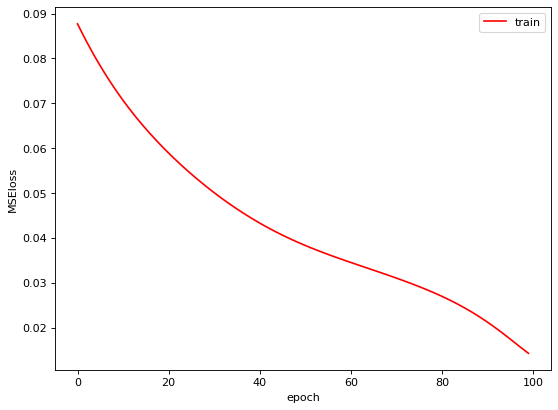

In [451]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [452]:
# test_output, hidden = rnn_model(Variable(torch.from_numpy(rnn_test_data).float()))
# for i in test_output:
#     print(i)
#     if test_output[i][1] >= 0.9:
#         test_output[i][1] = 1
#     else:
#         test_output[i][1] = 0
# for i in test_output:
#     if i[1] != 0:
#         print(i)

rnn_test_price_differences = []
for idx_window, prices_28_list in enumerate(test_output):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list):
#         print('price: %s' % price)
        if idx != 0:
            difference = prices_28_list[idx - 1] - float(price)
#             print(difference)
#             print(type(difference))
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    rnn_test_price_differences.append(price_differences)
    

tensor([[0.1337, 0.1320, 0.1635,  ..., 0.0730, 0.1267, 0.0352],
        [0.0866, 0.1196, 0.1457,  ..., 0.0728, 0.1526, 0.0569],
        [0.0693, 0.1061, 0.1394,  ..., 0.0740, 0.1612, 0.0623],
        ...,
        [0.4518, 0.4435, 0.2823,  ..., 0.5809, 0.2419, 0.5736],
        [0.4357, 0.4413, 0.2733,  ..., 0.5889, 0.2439, 0.5812],
        [0.4278, 0.4379, 0.2692,  ..., 0.5942, 0.2441, 0.5841]],
       grad_fn=<SliceBackward0>)

In [455]:
rnn_test_price_differences = np.array(rnn_test_price_differences).reshape((10606, 1, 27))
final_cnn_output = cnn_model(Variable(torch.from_numpy(rnn_test_price_differences).float()))
window_idxes = []
for window_idx, i in enumerate(final_cnn_output):
#     print(final_cnn_output[window_idx][0])
    if float(final_cnn_output[window_idx][0]) >= float(final_cnn_output[window_idx][1]):
        window_idxes.append(window_idx)
window_idxes

[2977,
 3010,
 3132,
 3324,
 3329,
 3351,
 3360,
 3361,
 3370,
 3373,
 3376,
 3420,
 3423,
 3432,
 3441,
 3462,
 3472,
 3481,
 3489,
 3495,
 3498,
 3501,
 3504,
 3508,
 3523,
 3531,
 3533,
 3539,
 3545,
 3546,
 3548,
 3552,
 3555,
 3557,
 3559,
 3561,
 3562,
 3564,
 3599,
 3601,
 3611,
 3613,
 3637,
 3643,
 3660,
 3680,
 3682,
 3689,
 3692,
 3694,
 3696,
 3698,
 3700,
 3715,
 3723,
 3725,
 3726,
 3732,
 3733,
 3738,
 3740,
 3746,
 3751,
 3757,
 3771,
 3783,
 3789,
 3792,
 3796,
 3798,
 3802,
 3804,
 3808,
 3821,
 3823,
 3826,
 3827,
 3837,
 3839,
 3840,
 3843,
 3853,
 3855,
 3856,
 3864,
 3865,
 3871,
 3876,
 3878,
 3879,
 3889,
 3890,
 3891,
 3896,
 3897,
 3921,
 3927,
 3928,
 3929,
 3935,
 3936,
 3942,
 3949,
 3960,
 3961,
 3962,
 3963,
 3968,
 3970,
 3971,
 3978,
 3982,
 3984,
 3985,
 3987,
 3988,
 3989,
 3993,
 3998,
 3999,
 4010,
 4012,
 4018,
 4031,
 4032,
 4035,
 4038,
 4042,
 4043,
 4049,
 4050,
 4051,
 4052,
 4055,
 4057,
 4059,
 4062,
 4070,
 4072,
 4073,
 4095,
 4108,
 4110,

In [466]:
test_output[2977]

tensor([0.0813, 0.1081, 0.1450, 0.0467, 0.1864, 0.0574, 0.0944, 0.0252, 0.1408,
        0.2437, 0.1493, 0.1418, 0.0762, 0.0808, 0.1002, 0.1378, 0.1181, 0.0615,
        0.1477, 0.1409, 0.0194, 0.1107, 0.0467, 0.1525, 0.1464, 0.1004, 0.1619,
        0.0823], grad_fn=<SelectBackward0>)

In [457]:
test_output[2978]

tensor([0.0795, 0.1026, 0.1462, 0.0411, 0.1886, 0.0567, 0.0907, 0.0182, 0.1463,
        0.2537, 0.1537, 0.1435, 0.0655, 0.0806, 0.0988, 0.1352, 0.1162, 0.0578,
        0.1430, 0.1361, 0.0099, 0.1111, 0.0409, 0.1539, 0.1408, 0.0987, 0.1614,
        0.0803], grad_fn=<SelectBackward0>)

In [465]:
max_arg = torch.argmax(test_output[2977]), test_output[2977][9]

(tensor(9), tensor(0.2437, grad_fn=<SelectBackward0>))

In [478]:
min_arg = torch.argmin(test_output[2977])
min_arg, test_output[2977][20]

(tensor(20), tensor(0.0194, grad_fn=<SelectBackward0>))

In [472]:
rnn_test_date.shape

(10606, 1)

In [471]:
rnn_test_date

array([['1980-02-11T00:00:00.000000000'],
       ['1980-02-12T00:00:00.000000000'],
       ['1980-02-13T00:00:00.000000000'],
       ...,
       ['2022-01-06T00:00:00.000000000'],
       ['2022-01-07T00:00:00.000000000'],
       ['2022-01-10T00:00:00.000000000']], dtype='datetime64[ns]')

In [473]:
scaler.inverse_transform(test_output[:, 0].detach().numpy().reshape(test_output.shape[0], 1))

array([[ 726.61035],
       [ 505.10342],
       [ 423.95554],
       ...,
       [2220.87   ],
       [2145.3723 ],
       [2108.2178 ]], dtype=float32)

In [476]:
str(rnn_test_date[2978][0]).replace('T00:00:00.000000000', '')
sell_actural_price = data.loc[(  data['Date'] == str(corr_date_array[i - window_size + 1]).replace('T00:00:00.000000000', ''))]
# local_data = local_data.loc[( str(corr_date_array[i]).replace('T00:00:00.000000000', '') >= local_data['Date'] )]
# local_data = local_data['Close'].values

'1991-11-20'

In [486]:
total_profit = 0
for window_idx in window_idxes:
    try:
        # if sell signal exists 
        max_arg = torch.argmax(test_output[window_idx])
        min_arg = torch.argmin(test_output[window_idx])
        actural_selling_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+max_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_buying_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+min_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_selling_price = actural_selling_record['Close'].values
        actural_buying_price = actural_buying_record['Close'].values
        day_trade_profit = actural_selling_price - actural_buying_price
        total_profit += day_trade_profit
    except:
        print('window_idx: %s' % window_idx)
        print('max_arg: %s' % max_arg)
        print('min_arg: %s' % min_arg)
total_profit

window_idx: 10605
max_arg: tensor(5)
min_arg: tensor(4)


array([946.039308])

In [485]:
window_idxes[-1]

10605

In [36]:
prediction_price = scaler.inverse_transform(test_output[:, 0].detach().numpy().reshape(test_output.shape[0], 1))
prediction_price.shape

(10632, 1)

In [37]:
actual_price = test_dataset[rnn_seq_len + 1:]
actual_price = scaler.inverse_transform(actual_price)
actual_price.shape

(10632, 1)

In [411]:
final_cnn_output.shape

torch.Size([10606, 2])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

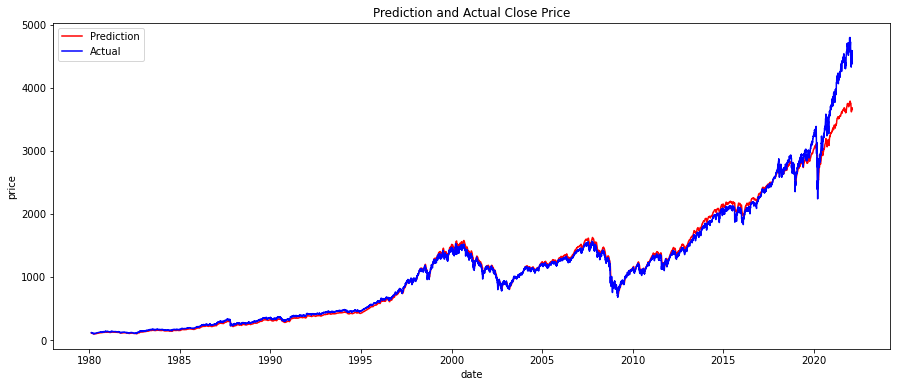

In [38]:
plt.figure(figsize=[15,6])
plt.plot(rnn_test_date[:, 0], prediction_price[:, 0], 'red', label = 'Prediction')
plt.plot(rnn_test_date[:, 0], actual_price[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

In [39]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [40]:
error = calculate_prediction_error(prediction_price, actual_price)
error.shape

(10632, 1)

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

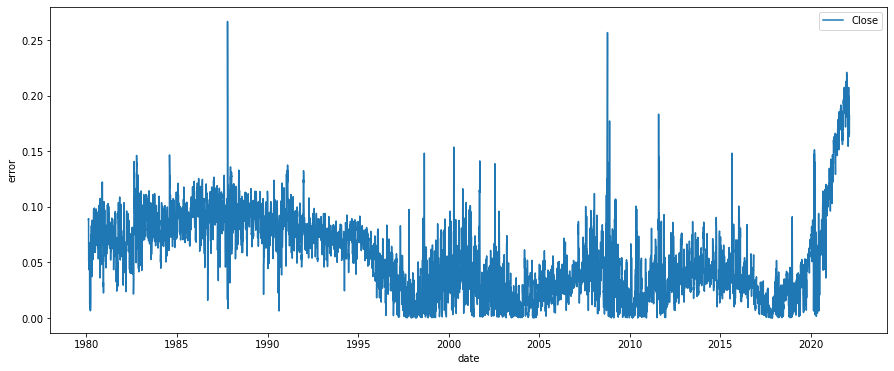

In [41]:
plt.figure(figsize=[15,6])
plt.plot(rnn_test_date[:, 0], error[:, 0], label = 'Close')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [44]:
# After training
initial_price = None
profit = 0
sell_point_array = []
buy_point_price_array = []
sell_point_date_array = []
label_set = np.zeros([len(corr_array), 1])

for i in range(len(test_output)):
    if (test_output[i][1] == 1):
        sell_point_array.append(corr_array[i])
#         print(str(corr_date_array[i - window_size]).replace('T00:00:00.000000000', ''))
        local_data = data.loc[(  data['Date'] >= str(corr_date_array[i - window_size + 1]).replace('T00:00:00.000000000', ''))]
        local_data = local_data.loc[( str(corr_date_array[i]).replace('T00:00:00.000000000', '') >= local_data['Date'] )]
        local_data = local_data['Close'].values
#         print(local_data)
        buy_point_price = np.amin(local_data)
        print(buy_point_price)
        if not initial_price:
            initial_price = buy_point_price
            share_amount = int(1000000 / initial_price)
            print('share_amount: %s' % share_amount)
        print('buy_point_price: %s' % buy_point_price)

        sell_point_close_price_data = prediction_price[i][0]
        print("sell_point_close_price_data: %s" % sell_point_close_price_data)
        label_set[i] = 1
        profit += sell_point_close_price_data - buy_point_price
print(len(sell_point_date_array))
print('total profit: %s' % str(profit*share_amount))
test_output

0
total profit: 0


tensor([[0.0020, 0.0000],
        [0.0020, 0.0000],
        [0.0021, 0.0000],
        ...,
        [0.7603, 0.0000],
        [0.7576, 0.0000],
        [0.7567, 0.0000]], grad_fn=<AsStridedBackward0>)

In [70]:
prediction_price

array([[ 141.5812 ],
       [ 141.90305],
       [ 142.33965],
       ...,
       [3461.575  ],
       [3447.4568 ],
       [3447.63   ]], dtype=float32)

In [71]:
#1. 条件 BC 跌幅是AB 涨幅的68% - 78% 
#2. 条件 CD 涨幅是BC 跌幅的126% - 162%
# D 就是 selling point (sell signal exists)
# 28天 close price 
# 1,2,4,5,7,9,6,5,4,6,9,12

In [89]:
sell_signal_windows = {}
b_points = {}
c_points = {}
for window_idx, window in enumerate(cnn_full_dataset):
    a_point = window[0][0]
    d_point = window[0][-1]
    for idx, close_price in enumerate(window[0]): # window 28 days
        if idx != 0:
            if window[0][idx-1] > window[0][idx]:
                b_point = window[0][idx-1]
#                 print('b_point: %s' % b_point)
                b_points[idx-1] = b_point
    for idx, close_price in enumerate(window[0]): # window 28 days
        reverse_idx = len(window[0]) - idx - 1
        a_point = window[0][0]
        d_point = window[0][-1]
        if idx != 27:
            if window[0][reverse_idx-1] > window[0][reverse_idx]:
                c_point = window[0][reverse_idx]
#                 print('c_point: %s' % c_point)
                c_points[reverse_idx] = c_point
    
    for b_point_idx in b_points:
        b_point = b_points[b_point_idx]
        for c_point_idx in c_points:
            c_point = c_points[c_point_idx]
            bc = b_point - c_point
            ab = b_point - a_point
            cd = d_point - c_point
            #1. 条件 BC 跌幅是AB 涨幅的61.8% - 78.6%
            if ab*0.68 < bc < ab*0.78:
                #2. 条件 CD 涨幅是BC 跌幅的126% - 162%
                if bc*1.26 < cd < bc*1.62:
                    sell_signal_windows[window_idx] = d_point


#     print(b_points)
#     print(c_points)
#     print(window[0])

# print(sell_signal_windows)

for sell_signal_window_idx in sell_signal_windows:
    print('Window idx: %s' % sell_signal_window_idx)
    print(cnn_full_dataset[sell_signal_window_idx])
    break
print('number of sell signals: %s' % len(sell_signal_windows))


Window idx: 31
[[0.00053326 0.0005965  0.0007588  0.00085154 0.0007883  0.00074615
  0.0007862  0.00083468 0.00082624 0.00080306 0.00072086 0.0005438
  0.00049954 0.00038361 0.00026769 0.00038783 0.00034357 0.00042998
  0.00044685 0.00053537 0.00059861 0.00058174 0.00059228 0.00060493
  0.0006513  0.00074615 0.00079674 0.00079674]]
number of sell signals: 1692


No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

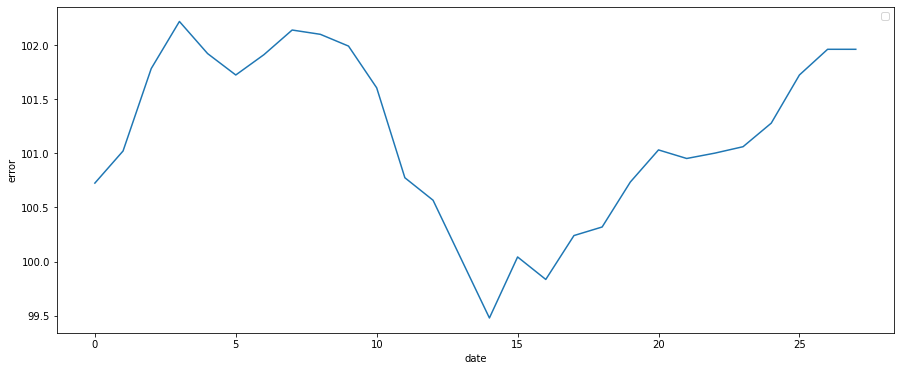

In [99]:
plt.figure(figsize=[15,6])
plt.plot(scaler.inverse_transform(cnn_full_dataset[sell_signal_window_idx])[0])

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [96]:
scaler.inverse_transform(cnn_full_dataset[sell_signal_window_idx])

array([[100.72545917, 101.02254819, 101.78507924, 102.22081424,
        101.92372125, 101.72566421, 101.91381924, 102.14158825,
        102.10197526, 101.99304126, 101.60682523, 100.77497318,
        100.56701116, 100.02234612,  99.47768208, 100.04215311,
         99.83419109, 100.24021412, 100.31943614, 100.73536415,
        101.03245317, 100.95322719, 101.0027412 , 101.06216119,
        101.28002819, 101.72566421, 101.96333424, 101.96333424]])

In [113]:
from PIL import Image
with Image.open("CandidateTrainSell/day648.png") as im:
    # create the image object to be the final product
    size = im.size
    offset_x = int(max((size[0] - im.size[0]) / 2, 0))
    offset_y = int(max((size[1] - im.size[1]) / 2, 0))
    offset_tuple = (offset_x, offset_y)
    final_thumb = Image.new(mode='RGBA',size=size,color=(255,255,255,0))
    # paste the thumbnail into the full sized image
    final_thumb.paste(im, offset_tuple)
    # save (the PNG format will retain the alpha band unlike JPEG)
    final_thumb.save('Test4.png','PNG')

In [487]:
inputs_price_list.shape

(15649, 1, 28)

In [493]:
# a = np.array(inputs_copy_price_list).reshape((15649, 1, 28))
# inputs_price_list = np.array(inputs_copy_price_list).reshape((15649, 1, 28))
cnn_full_dataset.shape

(15649, 1, 28)